In [1]:
!pip install gymnasium --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 3.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
import glob
import io
import matplotlib.pyplot as plt
import gymnasium as gym
from gym.envs.toy_text.taxi import *
import seaborn as sns
from tqdm import tqdm

# Environment Decription:

In [3]:

# Define the environment
env = gym.make('Taxi-v3')

# Print the observation space
print(env.observation_space)

# Print the action space
print(env.action_space)

# Primitive Actions
primitive_actions = {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}
print(f'primitive actions -> {primitive_actions}')

# Reset the environment and get the initial state
start_state = env.reset(seed=42)
print(f'Current state: {start_state}')

# Decode the state information
taxi_row, taxi_col, passenger_index, destination_index = env.decode(start_state[0])
print(f'Current state info: {taxi_row}, {taxi_col}, {passenger_index}, {destination_index}')

# Example Transitions

random_action = random.randint(0, 5)
print ("Action taken:", primitive_actions[random_action])

# Take a step in the environment
next_state, reward, is_terminal, _, transition_prob = env.step(random_action)
print(f'Transition probability: {transition_prob["prob"]}')
print(f'Next state: {next_state}')

# Decode the next state information
taxi_row, taxi_col, passenger_index, destination_index = env.decode(next_state)
print(f'Next state info: {taxi_row}, {taxi_col}, {passenger_index}, {destination_index}')

print(f'Reward received: {reward}')
print(f'Terminal state: {is_terminal}')


Discrete(500)
Discrete(6)
primitive actions -> {0: 'move south', 1: 'move north', 2: 'move east', 3: 'move west', 4: 'pick passenger up', 5: 'drop passenger off'}
Current state: (386, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})
Current state info: 3, 4, 1, 2
Action taken: move west
Transition probability: 1.0
Next state: 366
Next state info: 3, 3, 1, 2
Reward received: -1
Terminal state: False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(


# Options Defination: <br/>
Options to move the taxi to each of the four designated locations, executable
when the taxi is not already there.<br/>
In the following cell, these options are handcoded

In [4]:
# Go to location R
def go_to_R(env, state):
    option_done = False

    cab_row, cab_col, passenger_index, destination_index = env.decode(state)

    # Initially set the optimal action to move north
    optimal_action = 1

    # Check different conditions based on the taxi's position to determine the optimal action
    if cab_row == 0 and cab_col == 0:  # At location R
        option_done = True
    elif cab_col == 0 and cab_row != 0:  # At column 0
        optimal_action = 1  # Move north
    elif cab_col == 1 and cab_row <= 2:  # At column 1 above barrier
        optimal_action = 3  # Move west
    elif cab_col == 1 and cab_row > 2:  # At column 1 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 2 and cab_row >= 2:  # At column 2 below barrier
        optimal_action = 3  # Move west
    elif cab_col == 2 and cab_row < 2:  # At column 2 above barrier
        optimal_action = 0  # Move south
    elif cab_col == 3 and cab_row <= 2:  # At column 3 above barrier
        optimal_action = 3  # Move west
    elif cab_col == 3 and cab_row > 2:  # At column 3 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 4:  # At column 4
        optimal_action = 3  # Move west

    return [optimal_action, option_done]


# Go to location G
def go_to_G(env, state):
    option_done = False

    cab_row, cab_col, passenger_index, destination_index = env.decode(state)

    # Initially set the optimal action to move east
    optimal_action = 2

    # Check different conditions based on the taxi's position to determine the optimal action
    if cab_row == 0 and cab_col == 4:  # At location G
        option_done = True
    elif cab_col == 0 and cab_row <= 2:  # At column 0 above barrier
        optimal_action = 2  # Move east
    elif cab_col == 0 and cab_row > 2:  # At column 0 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 1 and cab_row < 2:  # At column 1 above barrier
        optimal_action = 0  # Move south
    elif cab_col == 1 and cab_row >= 2:  # At column 1 below barrier
        optimal_action = 2  # Move east
    elif cab_col == 2 and cab_row > 2:  # At column 2 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 2 and cab_row <= 2:  # At column 2 above barrier
        optimal_action = 2  # Move east
    elif cab_col == 3:  # At column 3
        optimal_action = 2  # Move east
    elif cab_col == 4:  # At column 4
        optimal_action = 1  # Move north

    return [optimal_action, option_done]


# Go to location Y
def go_to_Y(env, state):
    option_done = False

    cab_row, cab_col, passenger_index, destination_index = env.decode(state)

    # Initially set the optimal action to move south
    optimal_action = 0

    # Check different conditions based on the taxi's position to determine the optimal action
    if cab_row == 4 and cab_col == 0:  # At location Y
        option_done = True
    elif cab_col == 0:  # At column 0
        optimal_action = 0  # Move south
    elif cab_col == 1 and cab_row <= 2:  # At column 1 above barrier
        optimal_action = 3  # Move west
    elif cab_col == 1 and cab_row > 2:  # At column 1 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 2 and cab_row >= 2:  # At column 2 below barrier
        optimal_action = 3  # Move west
    elif cab_col == 2 and cab_row < 2:  # At column 2 above barrier
        optimal_action = 0  # Move south
    elif cab_col == 3 and cab_row <= 2:  # At column 3 above barrier
        optimal_action = 3  # Move west
    elif cab_col == 3 and cab_row > 2:  # At column 3 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 4:  # At column 4
        optimal_action = 3  # Move west

    return [optimal_action, option_done]


# Go to location B
def go_to_B(env, state):
    option_done = False

    cab_row, cab_col, passenger_index, destination_index = env.decode(state)

    # Initially set the optimal action to move south
    optimal_action = 0

    # Check different conditions based on the taxi's position to determine the optimal action
    if cab_row == 4 and cab_col == 3:  # At location B
        option_done = True
    elif cab_col == 0 and cab_row <= 2:  # At column 0 above barrier
        optimal_action = 2  # Move east
    elif cab_col == 0 and cab_row > 2:  # At column 0 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 1 and cab_row < 2:  # At column 1 above barrier
        optimal_action = 0  # Move south
    elif cab_col == 1 and cab_row >= 2:  # At column 1 below barrier
        optimal_action = 2  # Move east
    elif cab_col == 2 and cab_row > 2:  # At column 2 below barrier
        optimal_action = 1  # Move north
    elif cab_col == 2 and cab_row <= 2:  # At column 2 above barrier
        optimal_action = 2  # Move east
    elif cab_col == 3:  # At column 3
        optimal_action = 0  # Move south
    elif cab_col == 4:  # At column 4
        optimal_action = 3  # Move west

    return [optimal_action, option_done]


# Define the option dictionary
option_dict = {
    6: go_to_R,
    7: go_to_G,
    8: go_to_Y,
    9: go_to_B
}


Text(0.5, 0.98, 'Policy for the provided options')

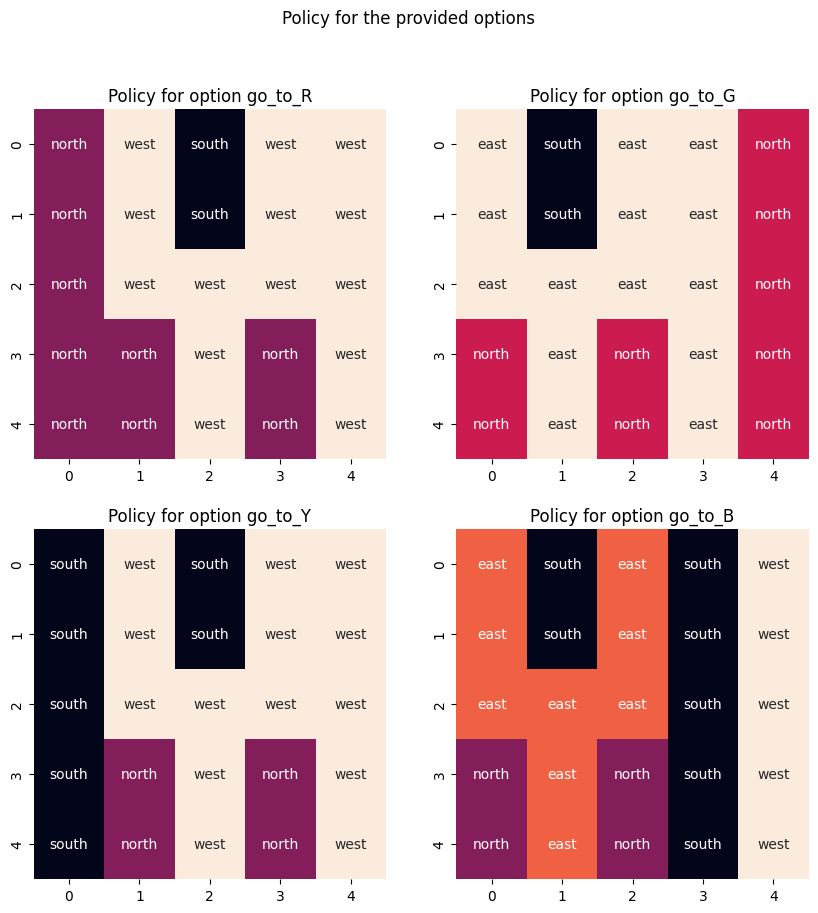

In [5]:
# Define the option policies for each location
opt_policy_R = np.array([[1, 3, 0, 3, 3],
                  [1, 3, 0, 3, 3],
                  [1, 3, 3, 3, 3],
                  [1, 1, 3, 1, 3],
                  [1, 1, 3, 1, 3]])

opt_policy_G = np.array([[2, 0, 2, 2, 1],
                  [2, 0, 2, 2, 1],
                  [2, 2, 2, 2, 1],
                  [1, 2, 1, 2, 1],
                  [1, 2, 1, 2, 1]])

opt_policy_Y = np.array([[0, 3, 0, 3, 3],
                  [0, 3, 0, 3, 3],
                  [0, 3, 3, 3, 3],
                  [0, 1, 3, 1, 3],
                  [0, 1, 3, 1, 3]])

opt_policy_B = np.array([[2, 0, 2, 0, 3],
                  [2, 0, 2, 0, 3],
                  [2, 2, 2, 0, 3],
                  [1, 2, 1, 0, 3],
                  [1, 2, 1, 0, 3]])

# Store the option policies in a list
option_policies = [opt_policy_R, opt_policy_G, opt_policy_Y, opt_policy_B]

# Define the names of the options
option_names = ['R', 'G', 'Y', 'B']

# Create subplots for each option policy
figure, axis = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the subplots
for i in range(2):
    for j in range(2):
        # Create a dictionary to map action indices to action labels
        action_labels = {0: 'south', 1: 'north', 2: 'east', 3: 'west'}

        # Use the dictionary to convert action indices to action labels for visualization
        labeled_policy = np.vectorize(action_labels.get)(option_policies[2 * i + j])

        # Plot the heatmap for the option policy
        heatmap = sns.heatmap(option_policies[2 * i + j], ax=axis[i, j], annot=labeled_policy, fmt='', cbar=False)
        axis[i, j].set_title("Policy for option go_to_{}".format(option_names[i * 2 + j]))

# Set the title for the overall plot
plt.suptitle(f'Policy for the provided options')


# Epsilon-greedy

In [6]:
# TODO: epsilon-greedy action selection function
def egreedy_policy(q_values,state,epsilon):

    # Randomly choose whether to explore or exploit
    if np.random.rand() < epsilon:
        # Explore: choose a random action
        action = np.random.randint(0, q_values.shape[1])

    else:
        # Exploit: choose the action with the highest Q-value
        action = np.argmax(q_values[state])

    return action



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# SMDP Q Learning:

The following cell implements SMDP Q-Learning with the handcoded options - go_to_R, go_to_G, go_to_Y, go_to_B

In [7]:
# Initialize Q-Table: (States x Actions) === (env.observation_space.n(500) x total actions(10))
q_values_SMDP = np.zeros((env.observation_space.n, 10))

# Initialize update frequency table
update_freq_SMDP = np.zeros((env.observation_space.n, 10))

# SMDP Q-Learning parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
n_episodes = 5000  # Number of episodes

# Initialize arrays to store rewards and steps per episode
rewards_SMDP = np.zeros(n_episodes)
steps_per_episode_SMDP = []

# Iterate over episodes
for episode in tqdm(range(n_episodes)):
    step_count = 0  # Initialize step count
    state = env.reset()[0]  # Get the initial state
    episode_done = False  # Initialize episode termination flag
    total_rewards = 0  # Initialize total rewards accumulator

    # While episode is not over
    while not episode_done:
        original_state = state  # Store original state before taking action
        step_count += 1  # Increment step count

#----------------------------------------------------------------------------------------------------

        # Choose action using epsilon-greedy policy For Learning
        action = egreedy_policy(q_values_SMDP, state, epsilon=0.001)

#----------------------------------------------------------------------------------------------------

        # If primitive action (0 to 5)
        if action < 6:
            # Take action and observe next state, reward, and termination flag
            next_state, reward, episode_done, _, _ = env.step(action)
            total_rewards += reward  # Accumulate rewards

            # Usual Q-Learning update rule for state-action pair
            q_values_SMDP[state][action] += alpha * (reward + gamma * np.max(q_values_SMDP[next_state]) - q_values_SMDP[state][action])
            # Increment update frequency for this state-action pair
            update_freq_SMDP[state][action] += 1

            state = next_state  # Move to next state

        reward_bar = 0  # Initialize reward accumulator for option

        # If option action (6 to 9)
        if action >= 6:
            option_done = False  # Initialize option termination flag
            tau = 0  # Initialize time step for exponentiating gamma

            # Loop until option is done or episode terminates
            while not option_done:
                # Choose action based on current option
                if action == 6:
                    opt_action, option_done = go_to_R(env, state)
                elif action == 7:
                    opt_action, option_done = go_to_G(env, state)
                elif action == 8:
                    opt_action, option_done = go_to_Y(env, state)
                elif action == 9:
                    opt_action, option_done = go_to_B(env, state)

                # Take action and observe next state, reward, and termination flag
                next_state, reward, episode_done, _, _ = env.step(opt_action)
                total_rewards += reward  # Accumulate total rewards

                # Update the discounted reward
                reward_bar += (gamma**tau) * reward  # Update reward_bar with discounted reward
                tau += 1  # Increment time step

                # Update Q Value when Option is terminated
                if option_done or episode_done:
                    # Update Q-values using SMDP Q-learning update rule
                    q_values_SMDP[original_state][action] += alpha * (reward_bar + (gamma ** tau) * np.max(q_values_SMDP[state]) - q_values_SMDP[original_state][action])
                    # Increment update frequency for this state-action pair
                    update_freq_SMDP[original_state][action] += 1


                state = next_state  # Move to next state

    rewards_SMDP[episode] = total_rewards  # Store total rewards for the episode
    steps_per_episode_SMDP.append(step_count)  # Store number of steps taken in the episode


  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 5000/5000 [00:11<00:00, 422.99it/s]


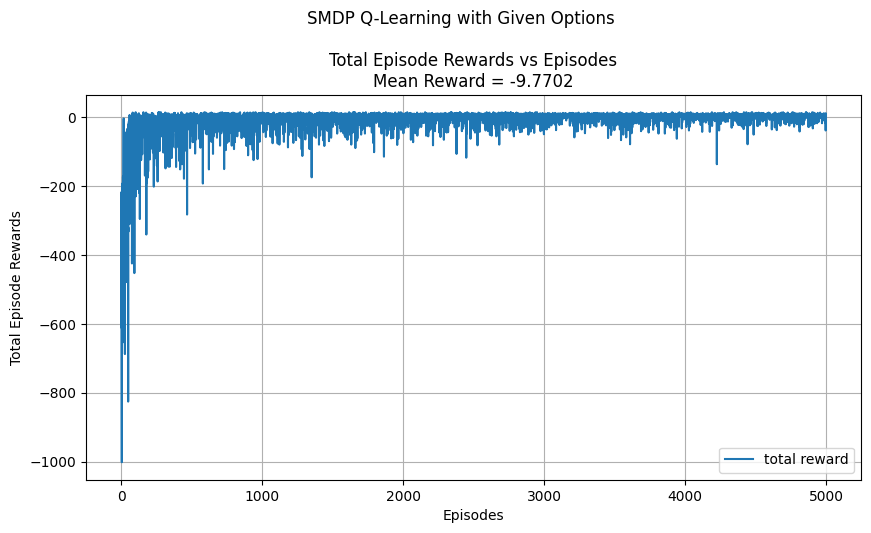

In [8]:
# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Plot total rewards per episode
plt.plot(np.arange(n_episodes), rewards_SMDP, label='total reward')

# Set title and super title
plt.title(f'Total Episode Rewards vs Episodes\nMean Reward = {np.mean(rewards_SMDP):.4f}')
plt.suptitle(f'SMDP Q-Learning with Given Options', y=1.05)


# Set labels for axes
plt.xlabel('Episodes')
plt.ylabel('Total Episode Rewards')

# Add grid lines
plt.grid()

# Add legend
plt.legend()


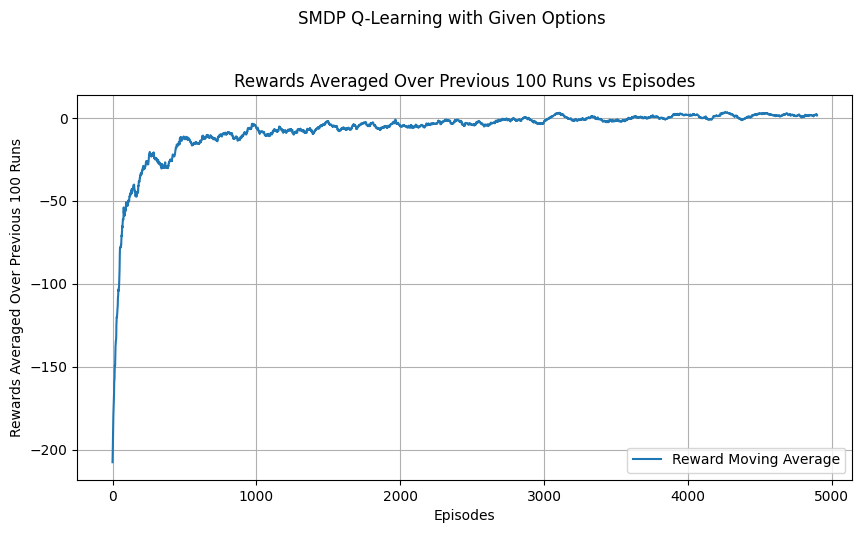

In [9]:
# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Calculate the moving average of rewards over a window of 100 episodes
avg_rewards = [np.average(rewards_SMDP[i:i+100]) for i in range(len(rewards_SMDP)-100)]

# Plot the moving average of rewards
plt.plot(avg_rewards, label='Reward Moving Average')

# Set labels for axes
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')

# Set title and super title
plt.suptitle('SMDP Q-Learning with Given Options', y=1.05)
plt.title('Rewards Averaged Over Previous 100 Runs vs Episodes')

# Add grid lines
plt.grid()

# Add legend
plt.legend()


# For Visulize Q values of SMDP :

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

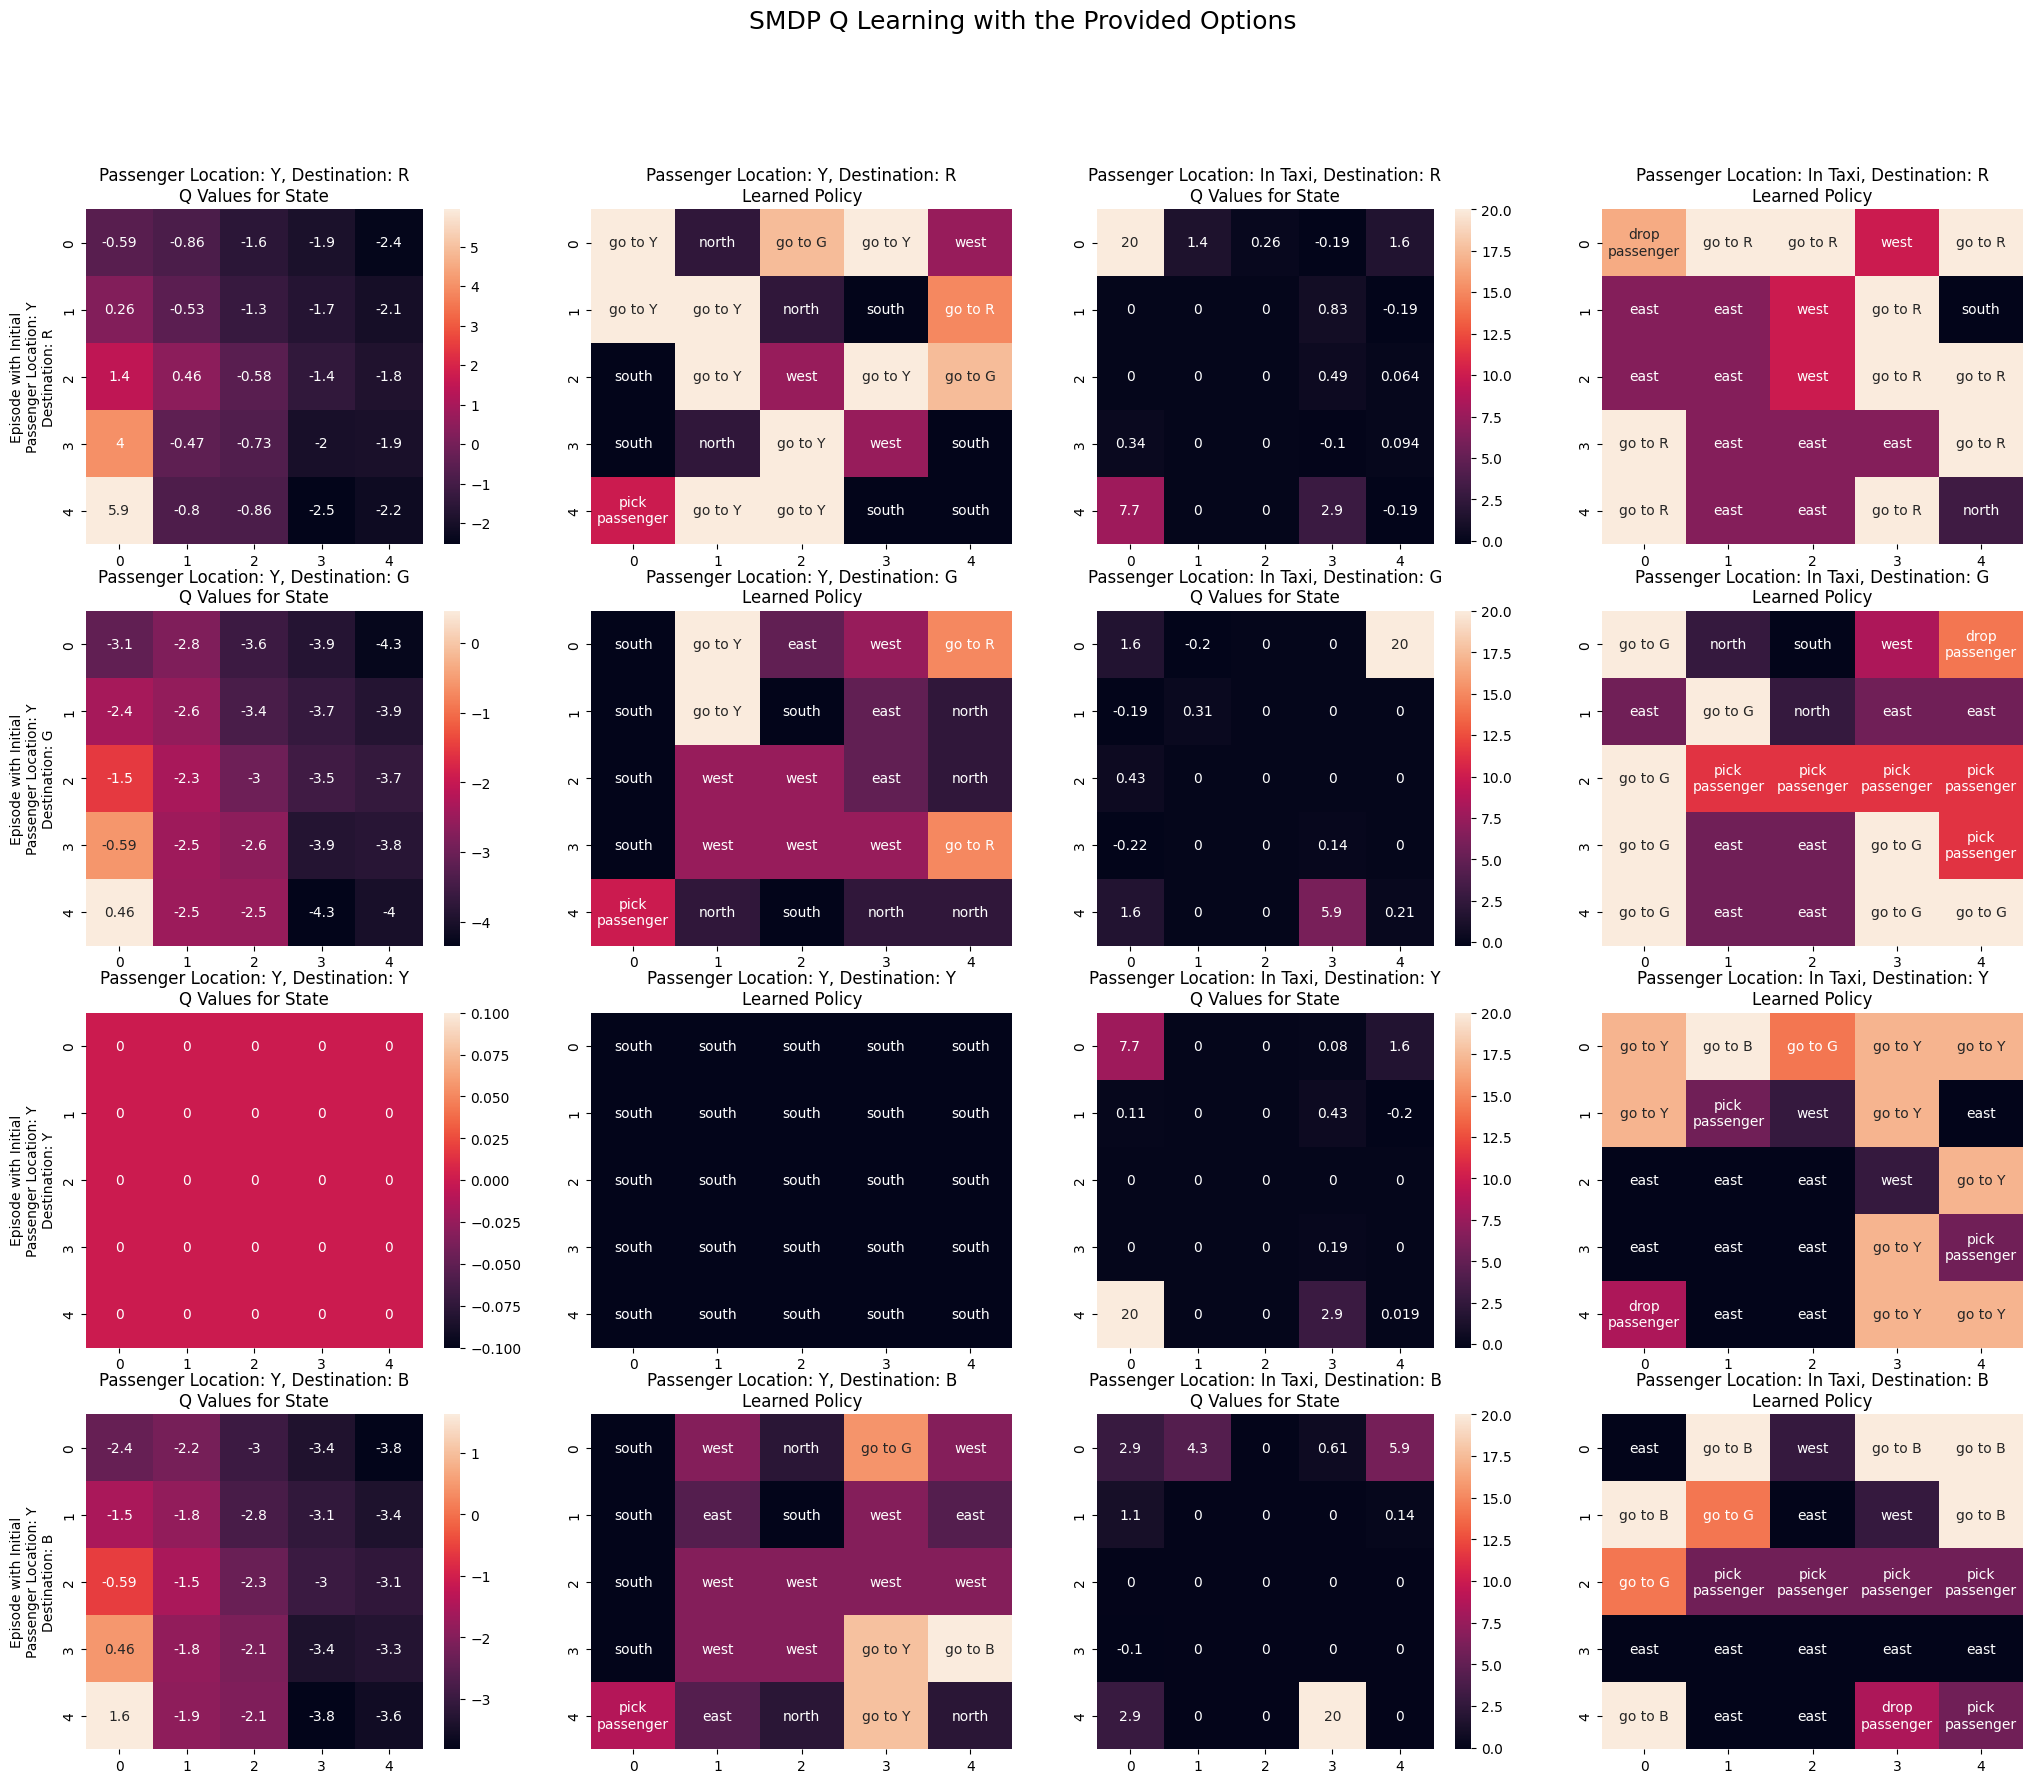

In [10]:
# Reshape Q-values matrix for visualization
reshaped_Q_matrix = q_values_SMDP.reshape(500, 10)

# Extract maximum Q-value for each state
max_Q_matrix = np.max(reshaped_Q_matrix, axis=-1)

# Extract the action with maximum Q-value for each state
argmax_Q_matrix = np.argmax(reshaped_Q_matrix, axis=-1)

# Define mappings for options and passenger locations
action_map = {
    0: 'south', 1: 'north', 2: 'east', 3: 'west',
    4: 'pick\npassenger', 5: 'drop\npassenger',
    6: 'go to R', 7: 'go to G', 8: 'go to Y', 9: 'go to B'
}
passenger_map = {0: 'R', 1: 'G', 2: 'Y', 3: 'B'}

# Map actions to their corresponding labels
labeled_argmax_Q_matrix = np.vectorize(action_map.get)(argmax_Q_matrix)

# Generate indices for passenger locations
indices = np.arange(20)


#-----------------------------------------------------------------------------------
# Determine passenger location (can be 0, 1, 2, 3, or 4)

# Modify this to visulize for other location of passenger
passenger_location = 2


#-----------------------------------------------------------------------------------

# Define indices for passenger outside the taxi and inside the taxi
passenger_outside_taxi_indices = indices[passenger_location * 4: passenger_location * 4 + 4]
passenger_inside_taxi_indices = indices[16:20]

# Create subplots for visualization
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

# Set super title for the entire plot
plt.suptitle('SMDP Q Learning with the Provided Options', fontsize=18)

# Iterate over passenger locations and destinations
for n, i in enumerate(passenger_outside_taxi_indices):
    _, _, passenger_loc, destination = env.decode(i)

    # Plot Q-values for the state (passenger outside taxi)
    axs[n][0].set_title(f'Passenger Location: {passenger_map[passenger_loc]}, Destination: {passenger_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {passenger_map[passenger_loc]}\nDestination: {passenger_map[destination]}')
    t = labeled_argmax_Q_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {passenger_map[passenger_loc]}, Destination: {passenger_map[destination]}\nLearned Policy')

    # Plot Q-values for the state (passenger inside taxi)
    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {passenger_map[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix[passenger_inside_taxi_indices[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])
    t = labeled_argmax_Q_matrix[passenger_inside_taxi_indices[n]::20].reshape(5, 5)
    sns.heatmap(argmax_Q_matrix[passenger_inside_taxi_indices[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {passenger_map[destination]}\nLearned Policy')


# Intra-Option Q-Learning



### Intra option is Off Policy Algorithm so we have used Epsilon Greedy to Learn and For the update in Q value will be depends on the option termination thus it has Different Behaviour policy and Different Evaluation Policy

In [11]:
# Q-Table: (States x Actions)
q_values_IOQL = np.zeros((500, 10))

# Update Frequency Data structure
update_freq_IOQL = np.zeros((500, 10))

# Intra-Option Q-Learning parameters
gamma = 0.9
alpha = 0.1
rewards_IOQL = []
steps_IOQL = []
n_eps = 5000

# Iterate over episodes
for episode in tqdm(range(n_eps)):
    total_rewards = 0
    step = 0
    state = env.reset()[0]  # get the initial state
    done = False

    # While episode is not over
    while not done:

        step += 1
#----------------------------------------------------------------------------------------------------

        # Choose action using epsilon-greedy policy For Learning
        action = egreedy_policy(q_values_IOQL, state, epsilon=0.001)

#----------------------------------------------------------------------------------------------------

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            total_rewards += reward

            # Update Q-values and update frequency for premitive actions
            q_values_IOQL[state][action] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][action])
            update_freq_IOQL[state][action] += 1
            state = next_state

        # If action is an option
        if action >= 6:
            optdone = False
            while not optdone and not done:
                # Execute option and update Q-values It return intermediate action to be performed
                optact, optdone = option_dict[action](env, state)
                next_state, reward, done, _, _ = env.step(optact)

                total_rewards += reward # Accumulate Reward

                # Update Q-values and update frequency for the sub actions which are part of option
                q_values_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_IOQL[next_state]) - q_values_IOQL[state][optact])
                update_freq_IOQL[state][optact] += 1


                # Update the Q-value for the current option
                q_values_IOQL[state][action] += alpha * (reward + gamma * ((1 - optdone) * q_values_IOQL[next_state][action] + optdone * np.max(q_values_IOQL[next_state])) - q_values_IOQL[state][action])
                update_freq_IOQL[state][action] += 1



                # Update Q-values and update frequency for other options with the same policy as current option
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if (action == 6 or action == 8) and taxi_col > 0:
                    for opt in range(6, 10):
                        if opt != action:
                            optaction_other, optdone_other = option_dict[opt](env, state)
                            if optact == optaction_other:
                                q_values_IOQL[state][opt] += alpha * (reward + gamma * ((1 - optdone_other) * q_values_IOQL[next_state][opt] + optdone_other * np.max(q_values_IOQL[next_state])) - q_values_IOQL[state][opt])
                                update_freq_IOQL[state][opt] += 1

                if (action == 7 or action == 9) and taxi_col < 3:
                    for opt in range(6, 10):
                        if opt != action:
                            optaction_other, optdone_other = option_dict[opt](env, state)
                            if optact == optaction_other:
                                q_values_IOQL[state][opt] += alpha * (reward + gamma * ((1 - optdone_other) * q_values_IOQL[next_state][opt] + optdone_other * np.max(q_values_IOQL[next_state])) - q_values_IOQL[state][opt])
                                update_freq_IOQL[state][opt] += 1


                state = next_state # Update current state




    rewards_IOQL.append(total_rewards)
    steps_IOQL.append(step)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 5000/5000 [00:11<00:00, 429.54it/s] 


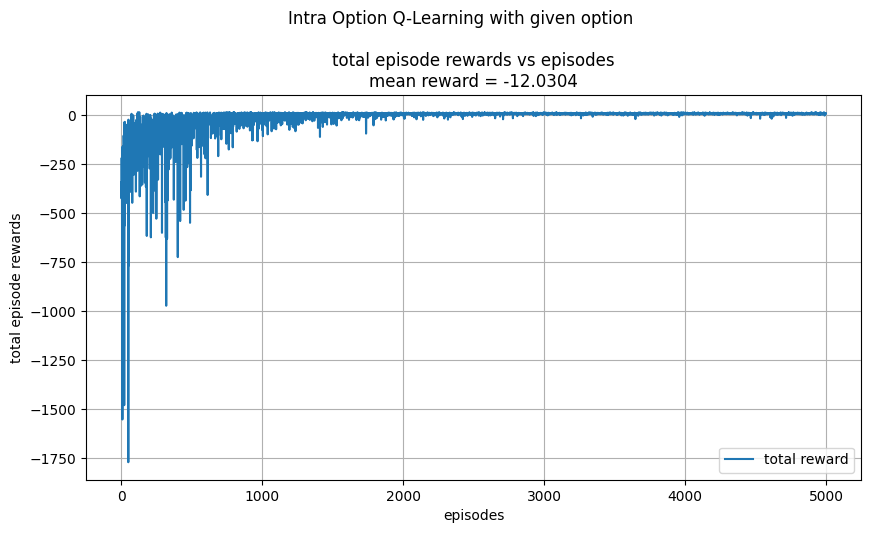

In [12]:
# Create a new figure with specified size
plt.figure(figsize=(10, 5))

# Plot total episode rewards against episodes
plt.plot(np.arange(n_eps), rewards_IOQL, label='total reward')

# Set the title of the plot with mean reward
plt.title(f'total episode rewards vs episodes\nmean reward = {np.mean(rewards_IOQL):.4f}')

# Set the super title of the plot
plt.suptitle(f'Intra Option Q-Learning with given option', y=1.05)


# Set x-axis label
plt.xlabel(f'episodes')

# Set y-axis label
plt.ylabel(f'total episode rewards')

# Add grid to the plot
plt.grid()

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()


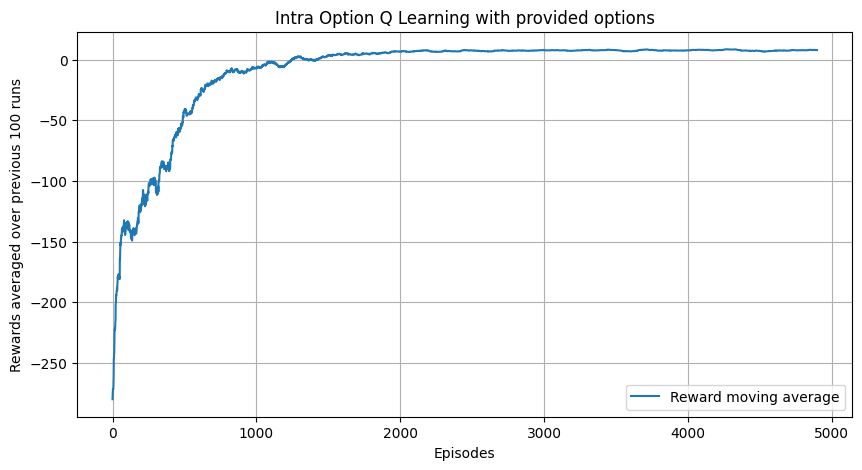

In [13]:
# Create a new figure with specified size
plt.figure(figsize=(10, 5))

# Calculate the moving average of rewards over 100 episodes
avg_rews0 = [np.average(rewards_IOQL[i:i+100]) for i in range(len(rewards_IOQL)-100)]

# Plot reward moving average
plt.plot(avg_rews0, label='Reward moving average')


# Set x-axis label
plt.xlabel('Episodes')

# Set y-axis label
plt.ylabel('Rewards averaged over previous 100 runs')

# Set the title of the plot
plt.title('Intra Option Q Learning with provided options')

# Add legend to the plot
plt.legend()

# Add grid to the plot
plt.grid()

# Display the plot
plt.show()


# For Visulize Q values of Intra Option

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

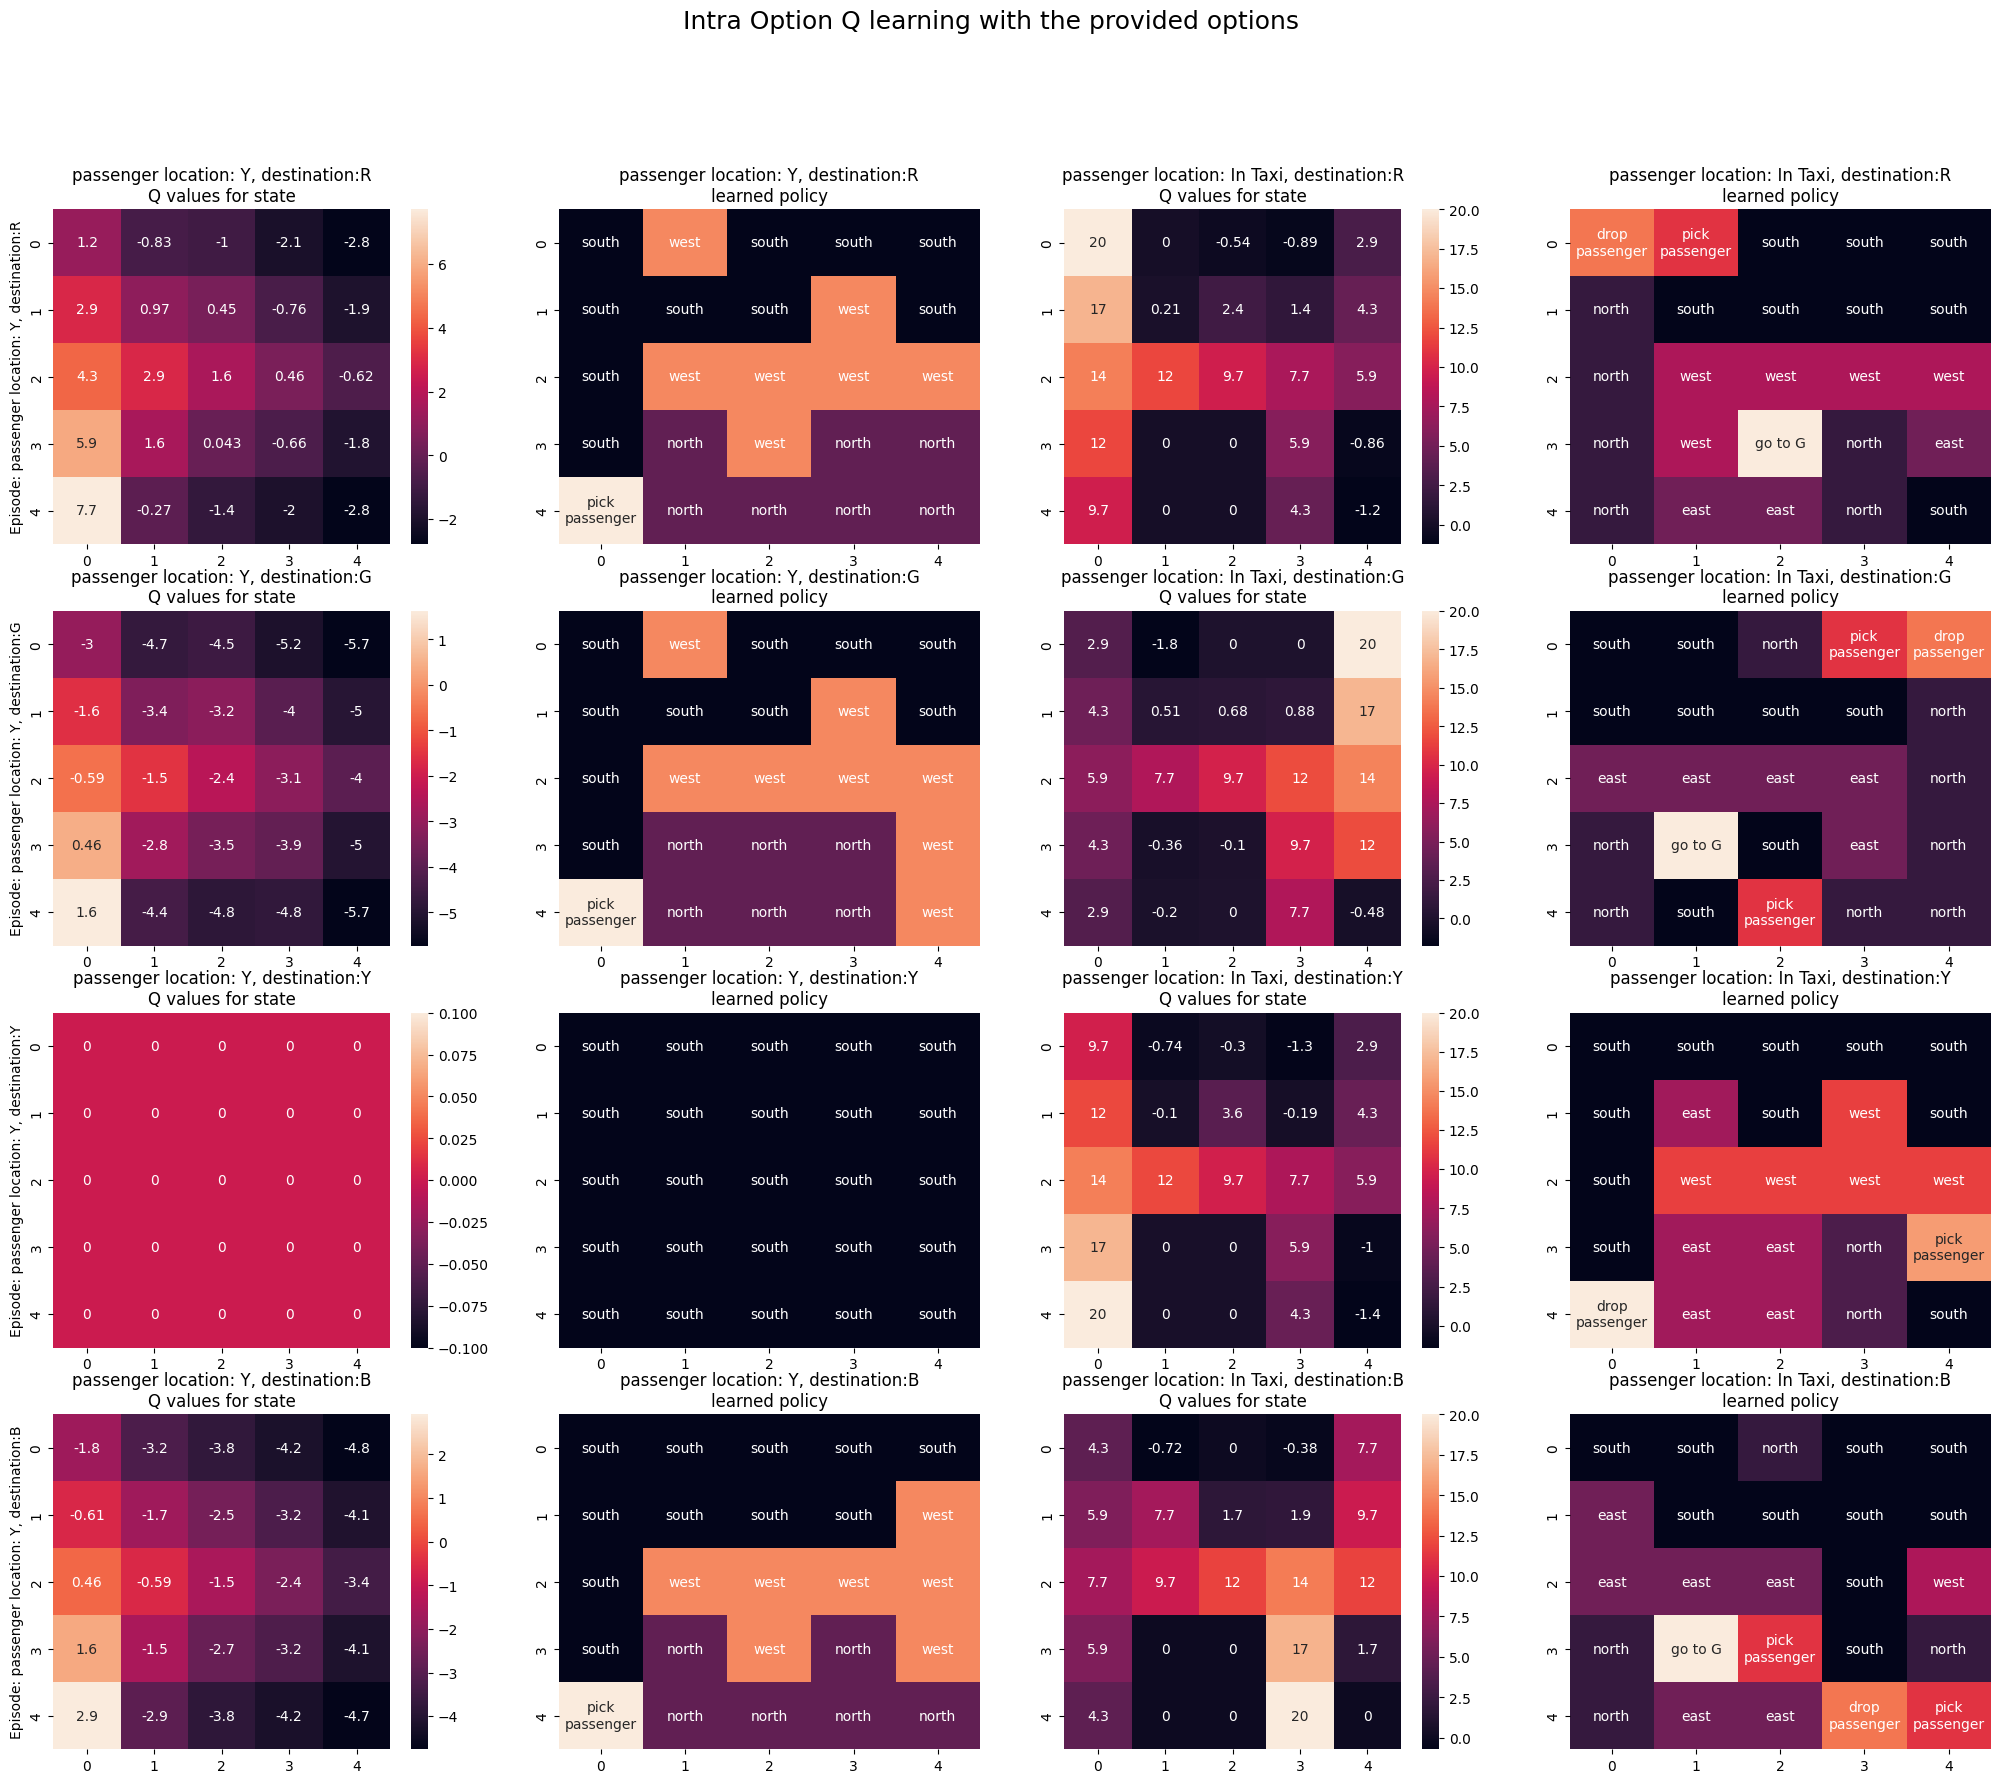

In [14]:
# Total Actions: ["up", "right", "down", "left", "Away", "Close"]
reshaped_IOQL_matrix = q_values_IOQL
argmax_IOQL_matrix = np.argmax(reshaped_IOQL_matrix, axis=-1)
max_IOQL_matrix = np.max(reshaped_IOQL_matrix, axis=-1)

# Define mappings for actions and passenger locations
action_map = {
    0: 'south', 1: 'north', 2: 'east', 3: 'west',
    4: 'pick\npassenger', 5: 'drop\npassenger',
    6: 'go to R', 7: 'go to G', 8: 'go to Y', 9: 'go to B'
}
passenger_map = {0: 'R', 1: 'G', 2: 'Y', 3: 'B'}

# Map the argmax values to action labels
labeled_argmax_IOQL_matrix = np.vectorize(action_map.get)(argmax_IOQL_matrix)

# Passenger locations
passenger_locations = np.arange(20)
#-----------------------------------------------------------------------------------
# Determine passenger location (can be 0, 1, 2, 3, or 4)

# Modify this to visulize for other location of passenger
passenger_location_idx = 2


#-----------------------------------------------------------------------------------

passenger_ids = passenger_locations[passenger_location_idx * 4:passenger_location_idx * 4 + 4]
passenger_ids_in_taxi = passenger_locations[16:20]

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))

# Set super title
plt.suptitle(f'Intra Option Q learning with the provided options', fontsize=18)

# Iterate through passenger locations
for idx, passenger_id in enumerate(passenger_ids):
    _, _, passenger_loc, destination = env.decode(passenger_id)

    # Plot Q-values for state when passenger is outside taxi
    axs[idx][0].set_title(f'passenger location: {passenger_map[passenger_loc]}, destination:{passenger_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[passenger_id::20].reshape(5, 5), annot=True, ax=axs[idx][0]).set(ylabel=f'Episode: passenger location: {passenger_map[passenger_loc]}, destination:{passenger_map[destination]}')
    t = labeled_argmax_IOQL_matrix[passenger_id::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[passenger_id::20].reshape(5, 5), annot=t, fmt='', ax=axs[idx][1], cbar=False)
    axs[idx][1].set_title(f'passenger location: {passenger_map[passenger_loc]}, destination:{passenger_map[destination]}\nlearned policy')

    # Plot Q-values for state when passenger is inside taxi
    axs[idx][2].set_title(f'passenger location: In Taxi, destination:{passenger_map[destination]}\nQ values for state')
    sns.heatmap(max_IOQL_matrix[passenger_ids_in_taxi[idx]::20].reshape(5, 5), annot=True, ax=axs[idx][2])
    t = labeled_argmax_IOQL_matrix[passenger_ids_in_taxi[idx]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[passenger_ids_in_taxi[idx]::20].reshape(5, 5), annot=t, fmt='', ax=axs[idx][3], cbar=False)
    axs[idx][3].set_title(f'passenger location: In Taxi, destination:{passenger_map[destination]}\nlearned policy')

plt.show()


# Comparision between SMDP and Intra Option:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


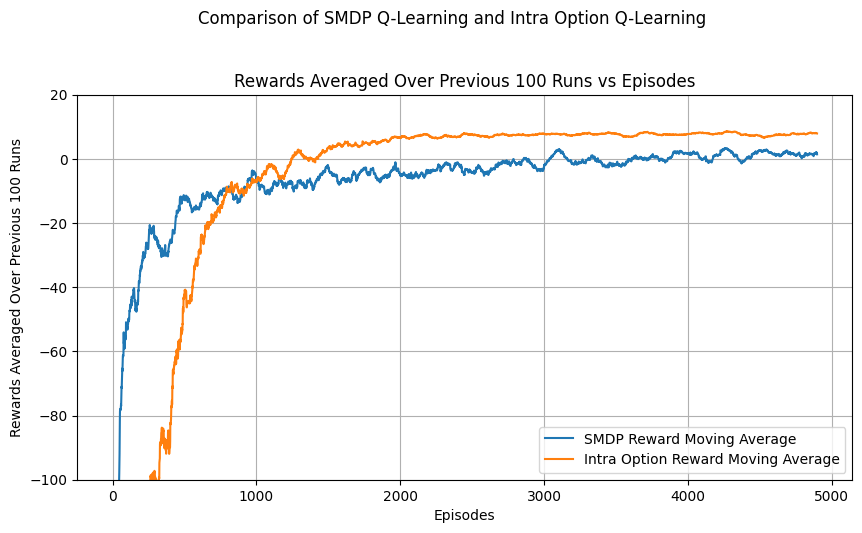

In [15]:
# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Calculate the moving average of rewards for SMDP Q-learning over a window of 100 episodes
avg_rewards_SMDP = [np.average(rewards_SMDP[i:i+100]) for i in range(len(rewards_SMDP)-100)]

# Plot the moving average of rewards for SMDP Q-learning
plt.plot(avg_rewards_SMDP, label='SMDP Reward Moving Average')

# Calculate the moving average of rewards for Intra Option Q-learning over a window of 100 episodes
avg_rewards_IOQL = [np.average(rewards_IOQL[i:i+100]) for i in range(len(rewards_IOQL)-100)]

# Plot the moving average of rewards for Intra Option Q-learning
plt.plot(avg_rewards_IOQL, label='Intra Option Reward Moving Average')


# Set labels for axes
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')

# Set title and super title
plt.suptitle('Comparison of SMDP Q-Learning and Intra Option Q-Learning', y=1.05)
plt.title('Rewards Averaged Over Previous 100 Runs vs Episodes')

# Clip the y-axis to display values within the range [-200, maximum_reward_value]
plt.ylim(-100, max(max(avg_rewards_SMDP), 20))
# Add grid lines
plt.grid()

# Add legend
plt.legend()


# Q3 -> New options - go_to_left_center, go_to_right_center

In [16]:
# Define new options: going to center seems to be a bad option

# Option: go to left center
def go_to_left_center(env, state):
    done_flag = False
    action_code = 3

    # Decode taxi's location
    cab_row, cab_col, _, _ = env.decode(state)

    # Check if taxi is at center
    if cab_row == 2 and cab_col == 0:
        done_flag = True  # Option is done

    # Move taxi towards left center
    elif cab_row < 2:
        action_code = 0  # Move south
    elif cab_row > 2:
        action_code = 1  # Move north
    elif cab_col > 0:
        action_code = 3  # Move west

    return [action_code, done_flag]

# Option: go to right center
def go_to_right_center(env, state):
    done_flag = False
    action_code = 2

    # Decode taxi's location
    cab_row, cab_col, _, _ = env.decode(state)

    # Check if taxi is at center
    if cab_row == 2 and cab_col == 4:
        done_flag = True  # Option is done

    # Move taxi towards right center
    elif cab_row < 2:
        action_code = 0  # Move south
    elif cab_row > 2:
        action_code = 1  # Move north
    elif cab_col < 4:
        action_code = 2  # Move east

    return [action_code, done_flag]


Text(0.5, 0.98, 'Policy for the new options')

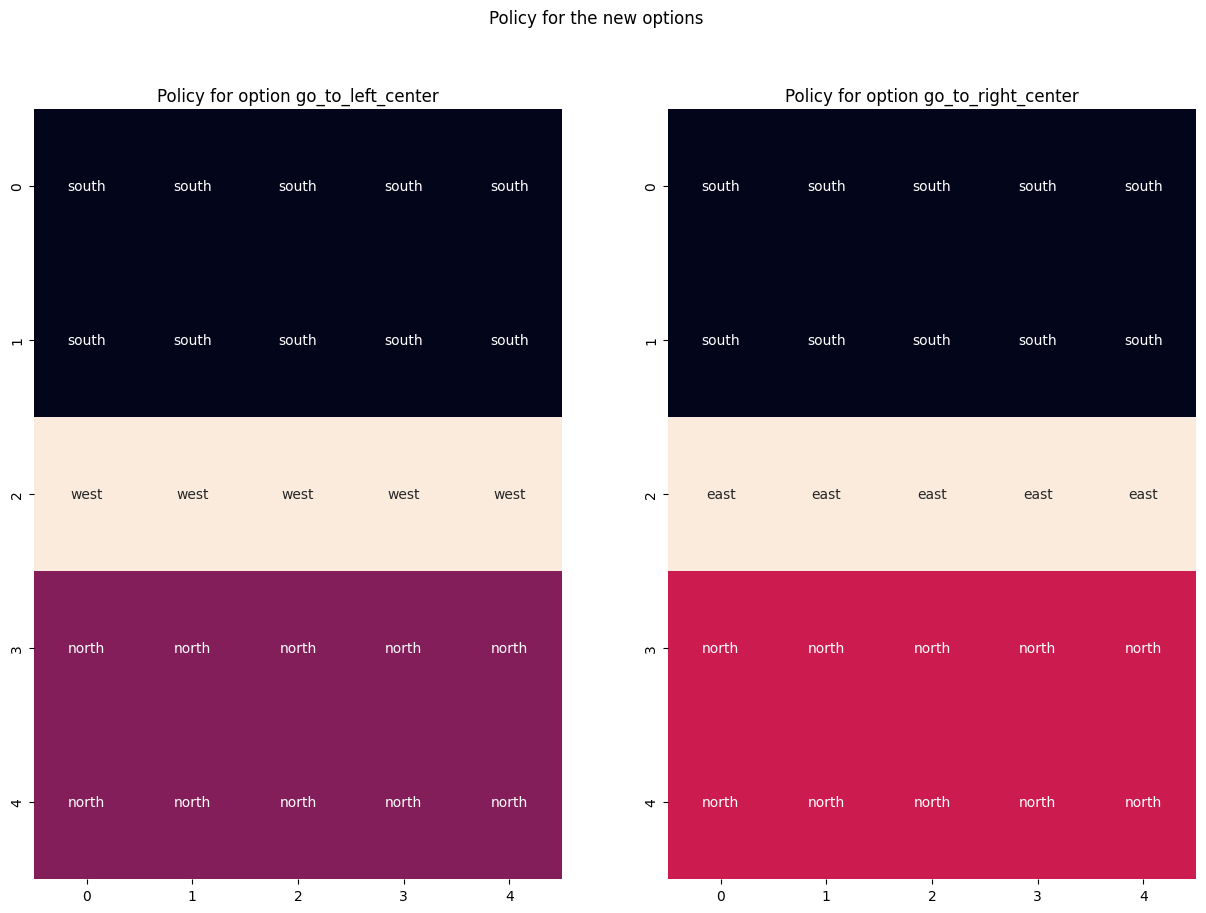

In [17]:
# Define policy matrices for the new options
left_policy = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [3, 3, 3, 3, 3],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

right_policy = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [2, 2, 2, 2, 2],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

# Define options and their names
options = [left_policy, right_policy]
option_names = ['left_center', 'right_center']

# Create subplots for visualization
figure, axis = plt.subplots(1, 2, figsize=(15, 10))

# Plot policy matrices for each option
for idx, option_policy in enumerate(options):
    action_labels = {0: 'south', 1: 'north', 2: 'east', 3: 'west'}
    action_labels_vectorized = np.vectorize(action_labels.get)(option_policy)
    sns.heatmap(option_policy, ax=axis[idx], annot=action_labels_vectorized, fmt='', cbar=False)
    axis[idx].set_title("Policy for option go_to_{}".format(option_names[idx]))

# Set super title for the plot
plt.suptitle(f'Policy for the new options')




# SMDP with New Options:
1. go to left center
2. go to right center

In [18]:
# Define Q-Table and Update Frequency data structures
q_values_new_op_SMDP = np.zeros((500, 8))
update_frequency_new_op_SMDP = np.zeros((500, 8))


#### SMDP Q-Learning

# Define parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
rewards_new_op_SMDP = []  # List to store rewards for each episode
steps_new_op_SMDP = []  # List to store number of steps for each episode
n_eps = 5000  # Number of episodes

# Iterate over episodes
for episode in tqdm(range(n_eps)):
    state = env.reset()[0]  # Get the initial state
    done = False  # Set episode termination flag to False
    total_rewards = 0  # Initialize total rewards for the episode
    step = 0  # Initialize step count for the episode

    # While episode is not over
    while not done:
        step += 1  # Increment step count
        # Choose action using epsilon-greedy policy
        action = egreedy_policy(q_values_new_op_SMDP, state, epsilon=0.001)

        # If the chosen action is a primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            # Update Q-values using Q-Learning update rule
            q_values_new_op_SMDP[state][action] += alpha * (reward + gamma * np.max(q_values_new_op_SMDP[next_state]) - q_values_new_op_SMDP[state][action])
            # Update frequency
            update_frequency_new_op_SMDP[state][action] += 1
            # Update total rewards
            total_rewards += reward
            # Update current state
            state = next_state

        # If the chosen action is an option
        reward_bar = 0  # Initialize cumulative reward within an option

        if action == 6:  # Option: go to left center
            optdone = False  # Initialize option termination flag
            org_state = state  # Store original state
            tau = 0  # Initialize timestep within the option
            while not optdone:  # Continue until option is complete
                optact, optdone = go_to_left_center(env, state)  # Execute option
                next_state, reward, done, _, _ = env.step(optact)  # Get next state and reward

                total_rewards += reward # Update total rewards

                reward_bar += (gamma**tau) * reward   # Update cumulative reward
                tau += 1  # Increment timestep within the option

                # Update Q-values using SMDP Q-Learning update rule when option is complete
                if optdone or done:
                    q_values_new_op_SMDP[org_state][action] += alpha * (reward_bar + (gamma ** tau) * np.max(q_values_new_op_SMDP[next_state]) - q_values_new_op_SMDP[org_state][action])
                    update_frequency_new_op_SMDP[org_state][action] += 1

                state = next_state  # Update current state

        if action == 7:  # Option: go to right center
            optdone = False  # Initialize option termination flag
            org_state = state  # Store original state
            tau = 0  # Initialize timestep within the option
            while not optdone:  # Continue until option is complete
                optact, optdone = go_to_right_center(env, state)  # Execute option
                next_state, reward, done, _, _ = env.step(optact)  # Get next state and reward

                total_rewards += reward  # Update total rewards

                reward_bar += (gamma**tau) * reward   # Update cumulative reward
                tau += 1  # Increment timestep within the option

                # Update Q-values using SMDP Q-Learning update rule when option is complete
                if optdone or done:
                    q_values_new_op_SMDP[org_state][action] += alpha * (reward_bar + (gamma ** tau) * np.max(q_values_new_op_SMDP[next_state]) - q_values_new_op_SMDP[org_state][action])
                    update_frequency_new_op_SMDP[org_state][action] += 1

                state = next_state  # Update current state

    rewards_new_op_SMDP.append(total_rewards)  # Append total rewards for the episode
    steps_new_op_SMDP.append(step)  # Append step count for the episode


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 5000/5000 [00:09<00:00, 546.12it/s]


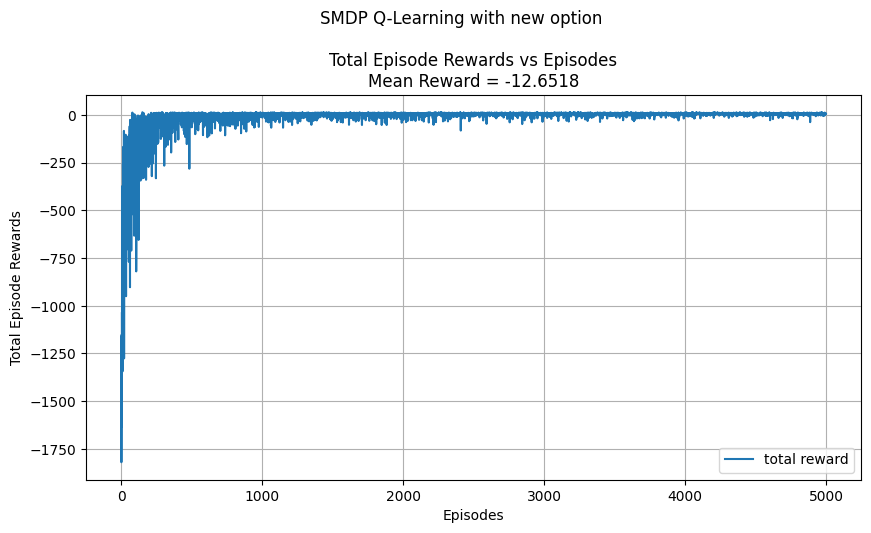

In [19]:
# Plotting total episode rewards versus episodes

plt.figure(figsize=(10, 5))  # Set figure size
# Plot total episode rewards
plt.plot(np.arange(n_eps), rewards_new_op_SMDP, label='total reward')
# Set plot title with mean reward value
plt.title(f'Total Episode Rewards vs Episodes\nMean Reward = {np.mean(rewards_new_op_SMDP):.4f}')
# Set super title for the plot
plt.suptitle(f'SMDP Q-Learning with new option', y=1.05)

# Set x-axis label
plt.xlabel(f'Episodes')
# Set y-axis label
plt.ylabel(f'Total Episode Rewards')
# Add grid to the plot
plt.grid()
# Add legend to the plot
plt.legend()


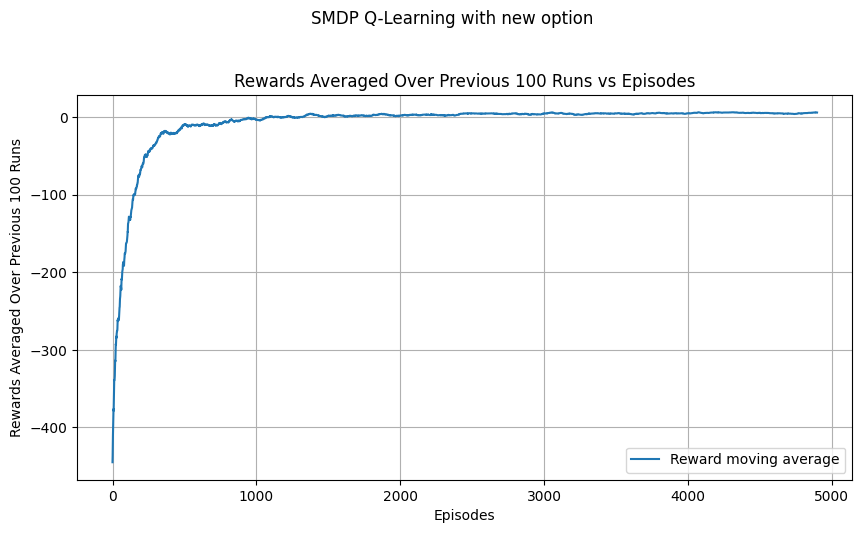

In [20]:
# Plotting rewards averaged over previous 100 runs versus episodes

plt.figure(figsize=(10, 5))  # Set figure size
# Calculate moving average of rewards
avg_rews0 = [np.average(rewards_new_op_SMDP[i:i+100]) for i in range(len(rewards_new_op_SMDP)-100)]
# Plot reward moving average
plt.plot(avg_rews0, label='Reward moving average')

# Set x-axis label
plt.xlabel('Episodes')
# Set y-axis label
plt.ylabel('Rewards Averaged Over Previous 100 Runs')
# Set super title for the plot
plt.suptitle(f'SMDP Q-Learning with new option', y=1.05)
# Set title for the plot
plt.title('Rewards Averaged Over Previous 100 Runs vs Episodes')
# Add grid to the plot
plt.grid()
# Add legend to the plot
plt.legend()


# Visulize Q values for SMDP New Options:

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

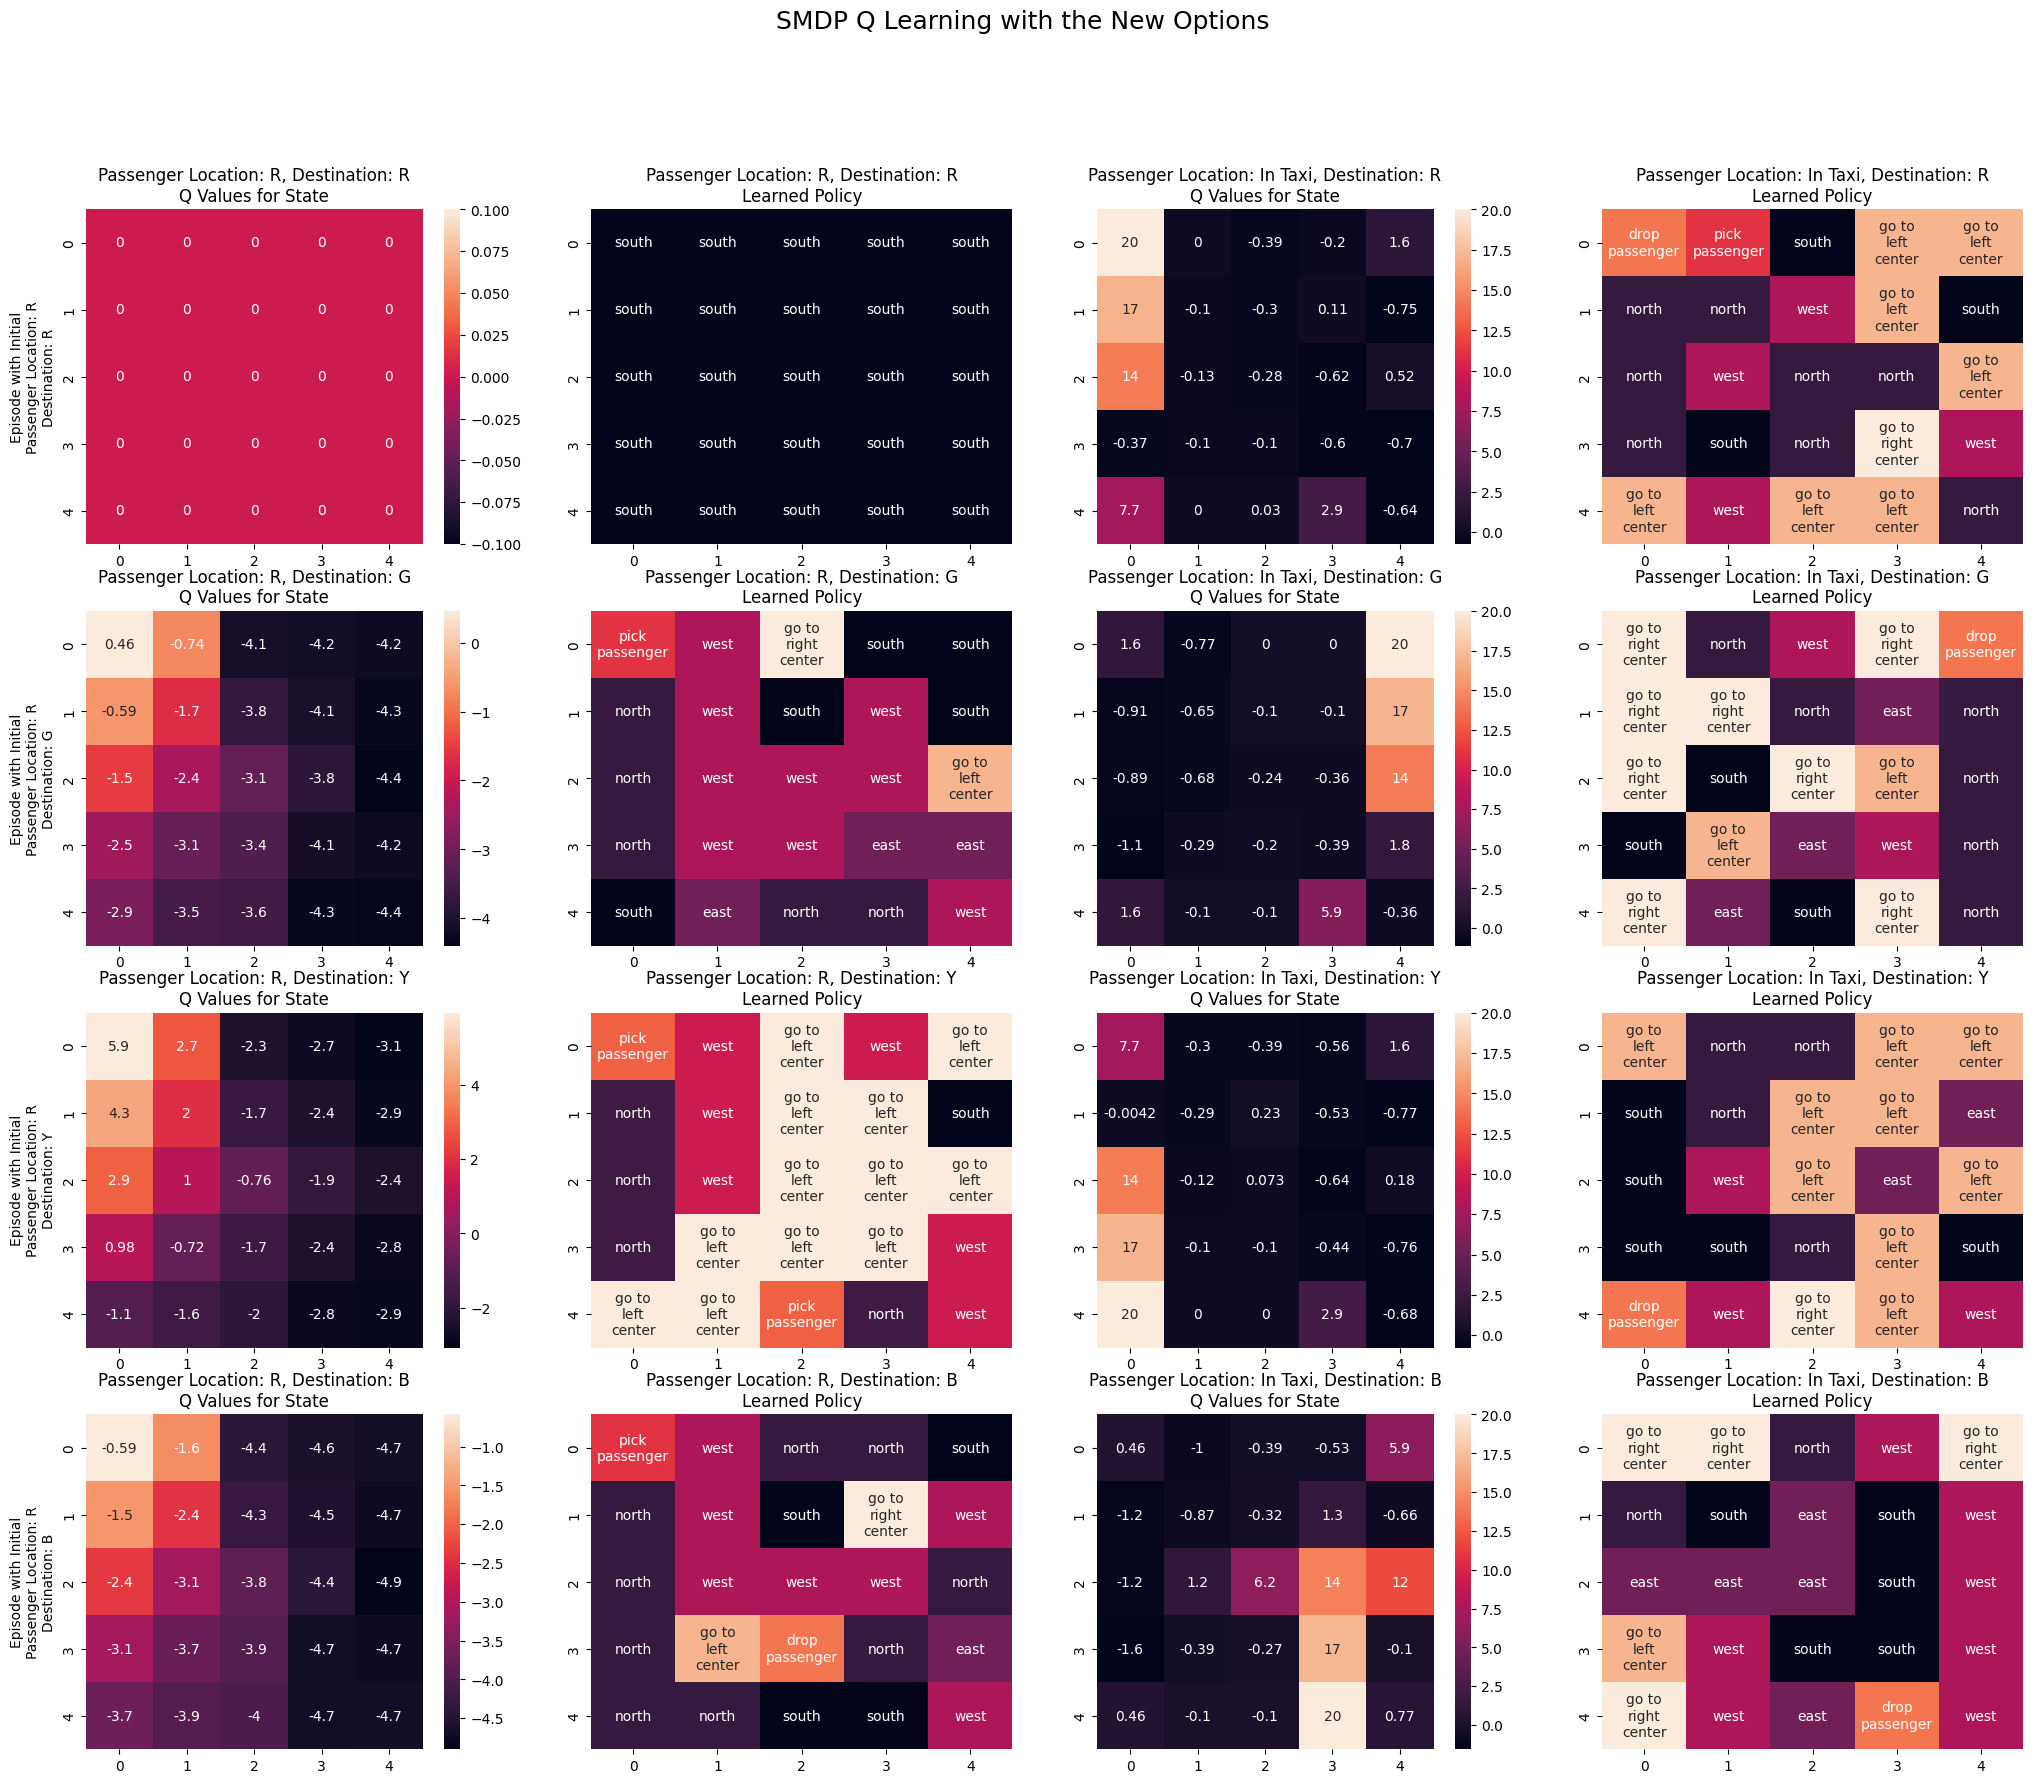

In [21]:
# Plotting Q values and learned policies for different passenger locations and destinations

reshaped_Q_matrix_SMDP = q_values_new_op_SMDP.reshape(500, 8)  # Reshape Q values matrix
max_Q_matrix_SMDP = np.max(reshaped_Q_matrix_SMDP, axis=-1)  # Get maximum Q value for each state
argmax_Q_matrix_SMDP = np.argmax(reshaped_Q_matrix_SMDP, axis=-1)  # Get index of maximum Q value for each state

# Define mappings for options, actions, and passenger locations
action_map_SMDP = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
passenger_map_SMDP = {0: 'R', 1: 'G', 2: 'Y', 3: 'B'}

# Map the argmax Q matrix to option names for better visualization
labeled_argmax_Q_matrix_SMDP = np.vectorize(action_map_SMDP.get)(argmax_Q_matrix_SMDP)

# Define indices for passenger locations
indices = np.arange(20)

# Passenger location index (0 to 4)
passenger_location = 0

# Split indices into passenger outside taxi and in taxi
indices_outside_taxi = indices[passenger_location * 4: passenger_location * 4 + 4]
indices_inside_taxi = indices[16:20]

# Create subplots for visualization
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25,20))

# Set super title for the plot
plt.suptitle(f'SMDP Q Learning with the New Options', fontsize=18)

# Loop through passenger locations and plot Q values and learned policies
for n, i in enumerate(indices_outside_taxi):
    _, _, passenger_loc, destination = env.decode(i)

    # Plot Q values for states with passenger outside taxi
    axs[n][0].set_title(f'Passenger Location: {passenger_map_SMDP[passenger_loc]}, Destination: {passenger_map_SMDP[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix_SMDP[i::20].reshape(5,5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode with Initial\nPassenger Location: {passenger_map_SMDP[passenger_loc]}\nDestination: {passenger_map_SMDP[destination]}')

    # Plot learned policies for states with passenger outside taxi
    t = labeled_argmax_Q_matrix_SMDP[i::20].reshape(5,5)
    sns.heatmap(argmax_Q_matrix_SMDP[i::20].reshape(5,5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {passenger_map_SMDP[passenger_loc]}, Destination: {passenger_map_SMDP[destination]}\nLearned Policy')

    # Plot Q values for states with passenger in taxi
    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {passenger_map_SMDP[destination]}\nQ Values for State')
    sns.heatmap(max_Q_matrix_SMDP[indices_inside_taxi[n]::20].reshape(5,5), annot=True, ax=axs[n][2])

    # Plot learned policies for states with passenger in taxi
    t = labeled_argmax_Q_matrix_SMDP[indices_inside_taxi[n]::20].reshape(5,5)
    sns.heatmap(argmax_Q_matrix_SMDP[indices_inside_taxi[n]::20].reshape(5,5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {passenger_map_SMDP[destination]}\nLearned Policy')


# Intra-Option Q-Learning with new Options

In [22]:
# Q-Table: (States x Actions) === (env.ns(500) x total actions(8))
q_values_new_op_IOQL = np.zeros((500, 8))

# Update Frequency Data structure
update_frequency_new_op_IOQL = np.zeros((500, 8))

# Add parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate

rewards_new_op_IOQL = []  # Store rewards for each episode
steps_new_op_IOQL = []  # Store steps for each episode

n_eps = 5000  # Number of episodes

# Iterate over episodes
for episode in tqdm(range(n_eps)):
    total_rewards = 0  # Initialize total rewards for the episode
    state = env.reset()[0]  # Get the initial state
    done = False  # Initialize done flag for episode termination
    step = 0  # Initialize step counter for the episode

    # While episode is not over
    while not done:
        step += 1  # Increment step counter

        # Choose action
        action = egreedy_policy(q_values_new_op_IOQL, state, epsilon=0.001)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            total_rewards += reward

            # Update Q values and update frequency for primitive action
            q_values_new_op_IOQL[state][action] += alpha * (reward + gamma * np.max(q_values_new_op_IOQL[next_state]) - q_values_new_op_IOQL[state][action])
            update_frequency_new_op_IOQL[state][action] += 1

            state = next_state  # Update current state

        # Checking if action chosen is an option

        if action == 6:  # Option: go to left center
            optdone = False
            while not optdone and not done:
                optact, optdone = go_to_left_center(env, state)  # Take option action
                next_state, reward, done, _, _ = env.step(optact)

                total_rewards += reward

                # Update Q values and update frequency for sub action of current option
                q_values_new_op_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_new_op_IOQL[next_state]) - q_values_new_op_IOQL[state][optact])
                update_frequency_new_op_IOQL[state][optact] += 1

                # Update Q value and update frequency for the other option which follows same policy as current option
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if optact == 7 and (taxi_row < 2 or taxi_row > 2):
                    q_values_new_op_IOQL[state][7] += alpha * (reward + gamma * (optact * np.max(q_values_new_op_IOQL[next_state]) + (1 - optact) * q_values_new_op_IOQL[next_state][7]) - q_values_new_op_IOQL[state][7])
                    update_frequency_new_op_IOQL[state][7] += 1


                # Update Q values and update frequency for current option
                q_values_new_op_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_new_op_IOQL[next_state]) + (1 - optdone) * (q_values_new_op_IOQL[next_state][action])) - q_values_new_op_IOQL[state][action])
                update_frequency_new_op_IOQL[state][action] += 1

                state = next_state



        if action == 7:  # Option: go to right center
            optdone = False
            while not optdone and not done:
                optact, optdone = go_to_right_center(env, state)  # Take option action
                next_state, reward, done, _, _ = env.step(optact)

                total_rewards += reward


                # Update Q values and update frequency for sub action of current option
                q_values_new_op_IOQL[state][optact] += alpha * (reward + gamma * np.max(q_values_new_op_IOQL[next_state]) - q_values_new_op_IOQL[state][optact])
                update_frequency_new_op_IOQL[state][optact] += 1


                # Update Q value and update frequency for the other option which follows same policy as current option
                taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
                if optact == 6 and (taxi_row < 2 or taxi_row > 2):
                    q_values_new_op_IOQL[state][6] += alpha * (reward + gamma * (optact * np.max(q_values_new_op_IOQL[next_state]) + (1 - optact) * q_values_new_op_IOQL[next_state][6]) - q_values_new_op_IOQL[state][6])
                    update_frequency_new_op_IOQL[state][6] += 1

                # Update Q values and update frequency for current option
                q_values_new_op_IOQL[state][action] += alpha * (reward + gamma * ((optdone) * np.max(q_values_new_op_IOQL[next_state]) + (1 - optdone) * (q_values_new_op_IOQL[next_state][action])) - q_values_new_op_IOQL[state][action])
                update_frequency_new_op_IOQL[state][action] += 1

                state = next_state



    rewards_new_op_IOQL.append(total_rewards)  # Append total rewards for the episode
    steps_new_op_IOQL.append(step)  # Append steps for the episode


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 5000/5000 [00:09<00:00, 534.48it/s] 


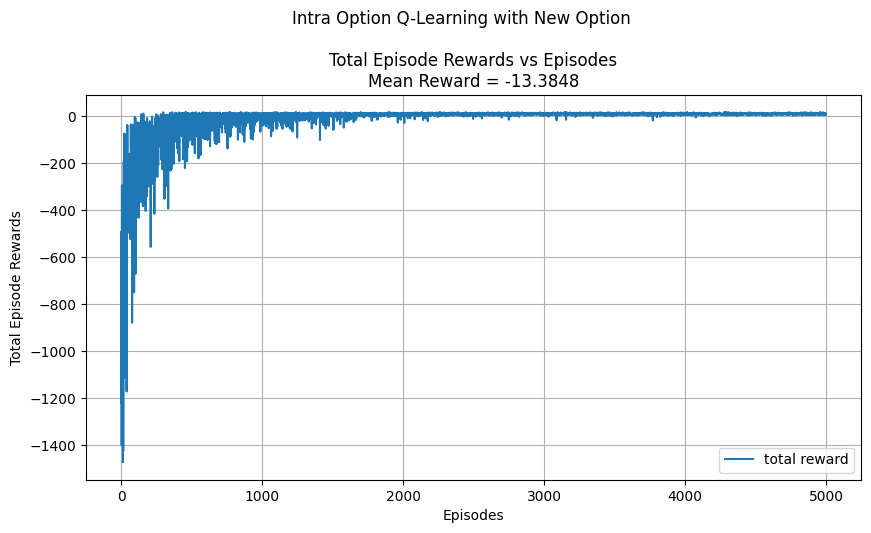

In [23]:
plt.figure(figsize=(10, 5))  # Set figure size

# Plot total episode rewards vs episodes
plt.plot(np.arange(n_eps), rewards_new_op_IOQL, label='total reward')
plt.title(f'Total Episode Rewards vs Episodes\nMean Reward = {np.mean(rewards_new_op_IOQL):.4f}')  # Set title
plt.suptitle(f'Intra Option Q-Learning with New Option', y=1.05)  # Set super title
plt.xlabel('Episodes')  # Set x-axis label
plt.ylabel('Total Episode Rewards')  # Set y-axis label
plt.grid()  # Add grid lines
plt.legend()  # Add legend


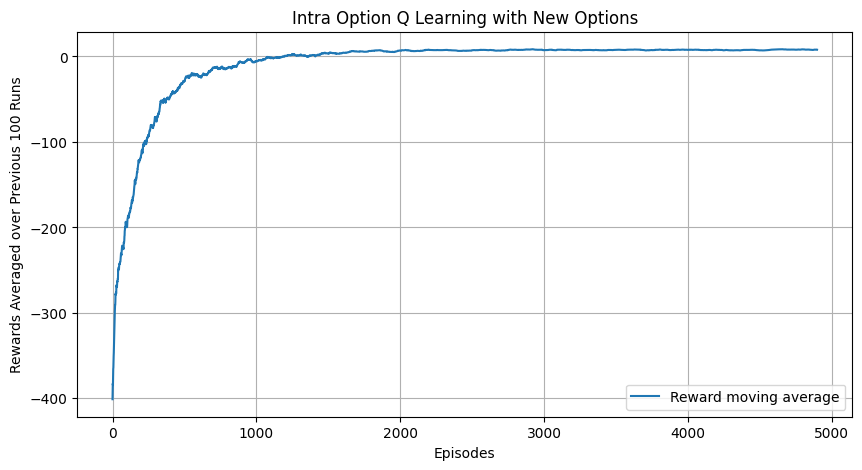

In [24]:
plt.figure(figsize=(10, 5))  # Set figure size

# Calculate moving average of rewards
avg_rews0 = [np.average(rewards_new_op_IOQL[i:i+100]) for i in range(len(rewards_new_op_IOQL)-100)]

# Plot moving average of rewards
plt.plot(avg_rews0, label='Reward moving average')



plt.xlabel('Episodes')  # Set x-axis label
plt.ylabel('Rewards Averaged over Previous 100 Runs')  # Set y-axis label
plt.title('Intra Option Q Learning with New Options')  # Set title
plt.legend()  # Add legend
plt.grid()  # Add grid lines


# Visulize Q values of Intra option for New Options:

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search t

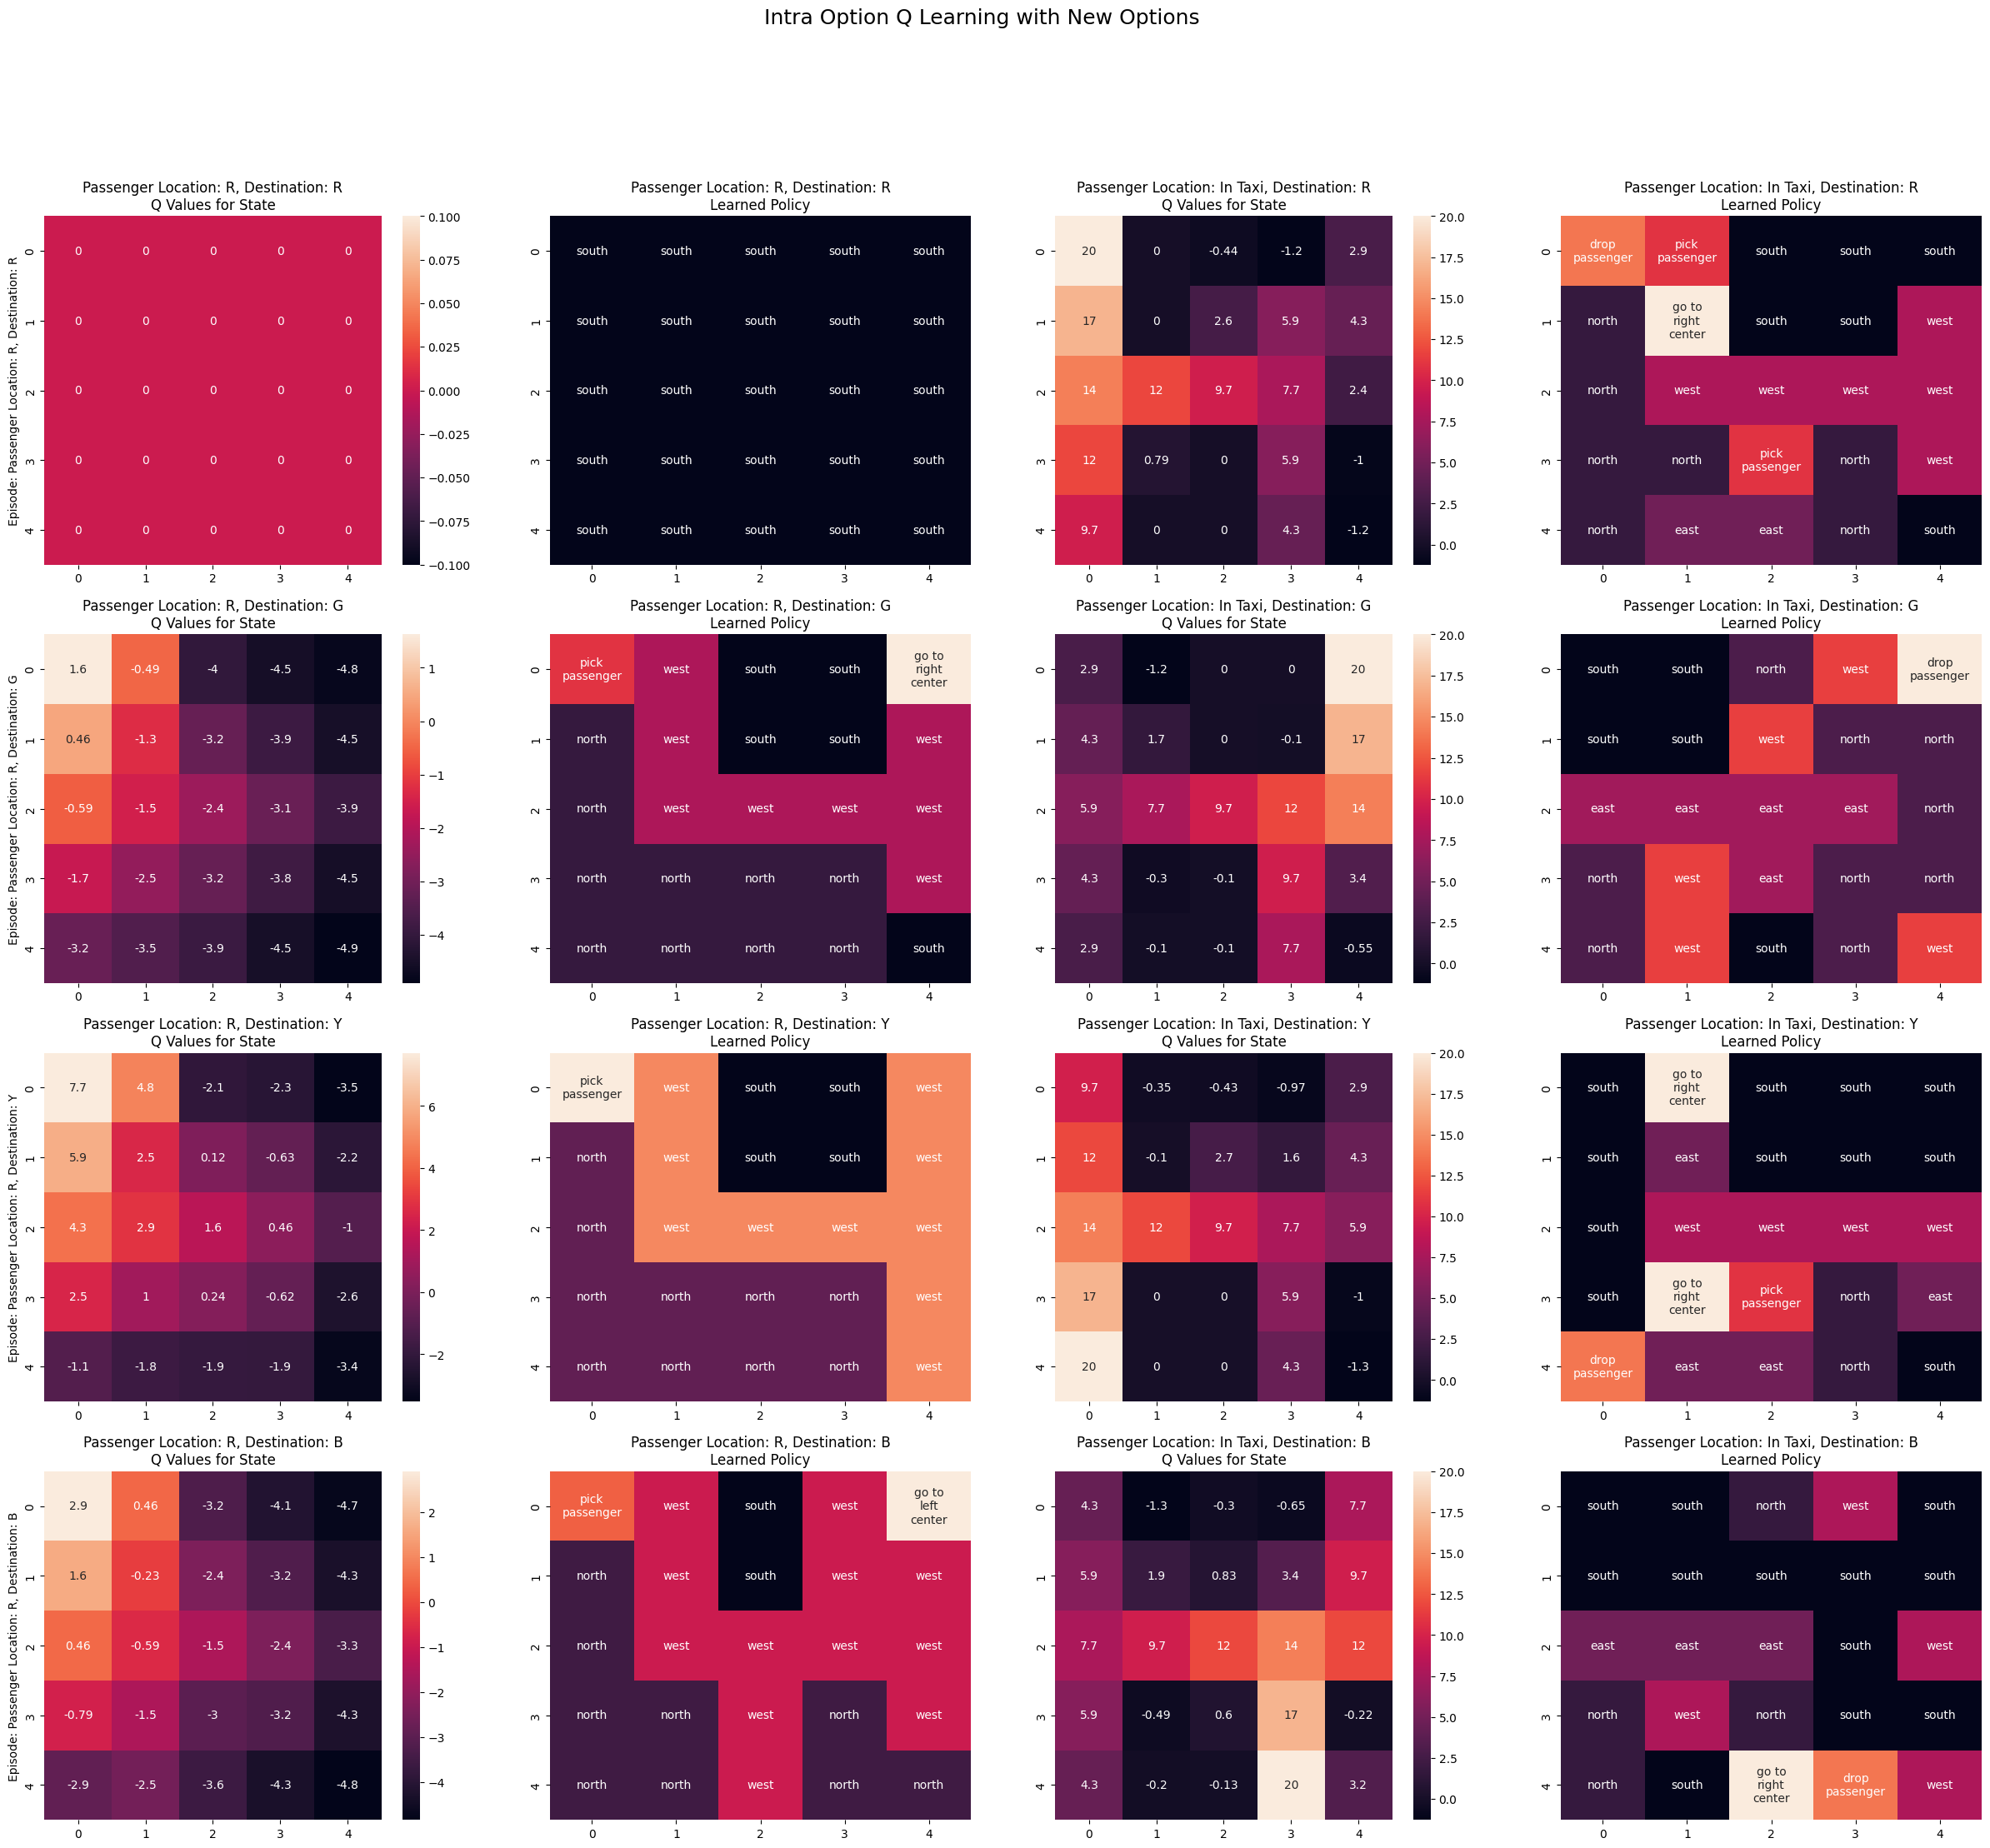

In [25]:
# Reshape Q-values matrix for visualization
reshaped_IOQL_matrix = q_values_new_op_IOQL.reshape(500, 8)

# Find the action with the highest Q-value for each state
argmax_IOQL_matrix = np.argmax(reshaped_IOQL_matrix, axis=-1)

# Find the maximum Q-value for each state
max_IOQL_matrix = np.max(reshaped_IOQL_matrix, axis=-1)

# Define mappings for actions and passenger locations
action_map_IOQL = {0: 'south', 1: 'north', 2: 'east', 3: 'west', 4: 'pick\npassenger', 5: 'drop\npassenger', 6: 'go to\nleft\ncenter', 7: 'go to\nright\ncenter'}
passenger_map_IOQL = {0: 'R', 1: 'G', 2: 'Y', 3: 'B'}

# Map the action indices to their corresponding labels
labeled_argmax_IOQL_matrix = np.vectorize(action_map_IOQL.get)(argmax_IOQL_matrix)

# Define indices for passenger locations
idx = np.arange(20)

#----------------------------------------------------------------------------

# Modify this to vizulize for other passenger location
# Set the passenger location (0-4)
passenger_location = 0

#----------------------------------------------------------------------------

# Extract indices corresponding to the passenger's location and inside the taxi
id = idx[passenger_location*4:passenger_location*4 + 4]
id_in_taxi = idx[16:20]

# Create subplots for visualization
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))

# Set the title for the entire visualization
plt.suptitle('Intra Option Q Learning with New Options', fontsize=18)

# Iterate over each subplot
for n, i in enumerate(id):
    _, _, passenger_loc, destination = env.decode(i)  # Decode the state into passenger and destination
    axs[n][0].set_title(f'Passenger Location: {passenger_map_IOQL[passenger_loc]}, Destination: {passenger_map_IOQL[destination]}\nQ Values for State')

    # Visualize Q-values for states outside the taxi
    sns.heatmap(max_IOQL_matrix[i::20].reshape(5, 5), annot=True, ax=axs[n][0]).set(ylabel=f'Episode: Passenger Location: {passenger_map_IOQL[passenger_loc]}, Destination: {passenger_map_IOQL[destination]}')

    # Visualize learned policy for states outside the taxi
    t = labeled_argmax_IOQL_matrix[i::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[i::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][1], cbar=False)
    axs[n][1].set_title(f'Passenger Location: {passenger_map_IOQL[passenger_loc]}, Destination: {passenger_map_IOQL[destination]}\nLearned Policy')

    axs[n][2].set_title(f'Passenger Location: In Taxi, Destination: {passenger_map_IOQL[destination]}\nQ Values for State')

    # Visualize Q-values for states inside the taxi
    sns.heatmap(max_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=True, ax=axs[n][2])

    # Visualize learned policy for states inside the taxi
    t = labeled_argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5)
    sns.heatmap(argmax_IOQL_matrix[id_in_taxi[n]::20].reshape(5, 5), annot=t, fmt='', ax=axs[n][3], cbar=False)
    axs[n][3].set_title(f'Passenger Location: In Taxi, Destination: {passenger_map_IOQL[destination]}\nLearned Policy')


# Comparision between SMDP and Intra Option with new options:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


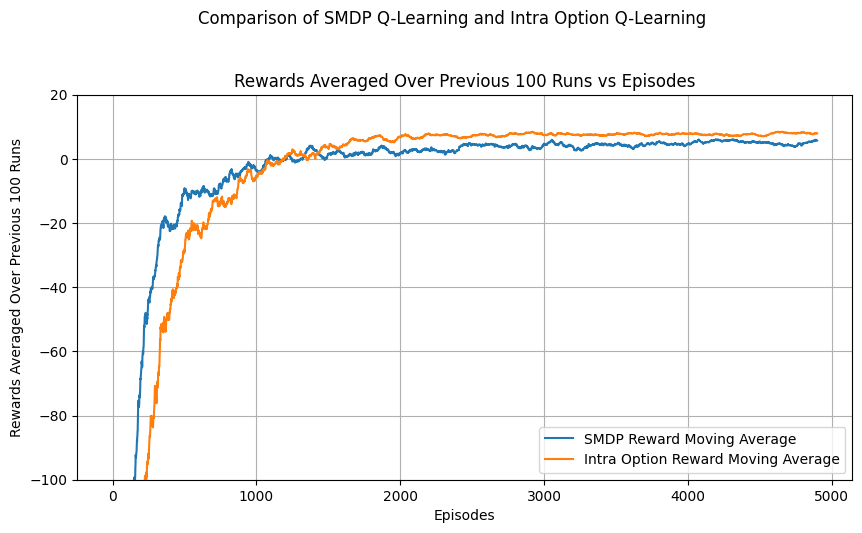

In [26]:
# Create a figure for plotting
plt.figure(figsize=(10, 5))

# Calculate the moving average of rewards for SMDP Q-learning over a window of 100 episodes
avg_rewards_SMDP = [np.average(rewards_new_op_SMDP[i:i+100]) for i in range(len(rewards_new_op_SMDP)-100)]

# Plot the moving average of rewards for SMDP Q-learning
plt.plot(avg_rewards_SMDP, label='SMDP Reward Moving Average')

# Calculate the moving average of rewards for Intra Option Q-learning over a window of 100 episodes
avg_rewards_IOQL = [np.average(rewards_new_op_IOQL[i:i+100]) for i in range(len(rewards_new_op_IOQL)-100)]

# Plot the moving average of rewards for Intra Option Q-learning
plt.plot(avg_rewards_IOQL, label='Intra Option Reward Moving Average')


# Set labels for axes
plt.xlabel('Episodes')
plt.ylabel('Rewards Averaged Over Previous 100 Runs')

# Set title and super title
plt.suptitle('Comparison of SMDP Q-Learning and Intra Option Q-Learning', y=1.05)
plt.title('Rewards Averaged Over Previous 100 Runs vs Episodes')

# Clip the y-axis to display values within the range [-200, maximum_reward_value]
plt.ylim(-100, max(max(avg_rewards_SMDP), 20))

# Add grid lines
plt.grid()

# Add legend
plt.legend()
